In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read MA PPE data
df = pd.read_csv('covid_19_region.csv', parse_dates=['Time'])
df.drop(['Total Persons Tested','Percent Positivity','Deaths','Hospitalized Total', 'Hospitalized ICU'], axis=1, inplace=True)
df = df.loc[df['Region']!='State Agency'].dropna(how='all')
df

Time                 Region  N95s/KN95s       Masks     Gowns  \
0   2020-04-29  Central Massachusetts    138350.0    263767.0   43293.0   
1   2020-04-30  Central Massachusetts    146820.0    269267.0   43573.0   
2   2020-05-01  Central Massachusetts    157800.0    276767.0   43838.0   
3   2020-05-02  Central Massachusetts    161960.0    277517.0   44658.0   
4   2020-05-03  Central Massachusetts    161960.0    277517.0   44658.0   
..         ...                    ...         ...         ...       ...   
315 2020-07-15          Massachusetts   4530795.0   4689430.0  705322.0   
316 2020-07-22          Massachusetts   7447255.0   6733830.0  714422.0   
317 2020-07-29          Massachusetts   8923945.0  10001695.0  726012.0   
318 2020-08-05          Massachusetts   9292070.0  10451295.0  734962.0   
319 2020-08-12          Massachusetts  10476785.0  11665045.0  736612.0   

         Gloves  Ventilators  Confirmed Cases  
0      454250.0         79.0           5363.0  
1      457450.0         79.0              NaN  
2      472050.0         79.0              NaN  
3      480450.0         79.0              NaN  
4      480450.0         79.0              NaN  
..          ...          ...              ...  
315   9469546.0        679.0         106128.0  
316   9590446.0        679.0         107413.0  
317   9906079.0        679.0         109096.0  
318   9971377.0        679.0         111371.0  
319  10116833.0        679.0         113198.0  

[280 rows x 8 columns]

# Note:
## This notebook is generalized in three parts for each region to analyze PPE distribution vs confirmed cases.
### 1: Figures of absolue value of cumulative PPE data vs cumulative confirmed cases data. 
### 2: Figures of ratios of PPE data to confirmed cases. (See comments for 6 different ratios)
### 3: Figures of regression and results.


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Summary
### 1: This data set is from DPH and MEMA. The PPEs are distributed to those who will have a supply shortage within the next 5 days and are not able to sourcethe material through their normal supply chain. This data set may not show the entire pucture of PPE supply in Mass.
### 2: At first, Feds gave Mass. the least amount of PPE but sent large shipments to states with smaller population and far few cases. (https://www.wbur.org/news/2020/07/23/fema-masks-ppe-massachusetts-coronavirus)
### 3: There is a huge increase on July 22 for N95s/KN95s which may be caused by large supplys from FEMA.(Not sure) 
### 4: For the same ppe, it has similar distribution trend in different regions while different ppes have different trends in the same region. 
### 5: There is a linear relationship between cumulative gowns/gloves and cumulative confirmed cases based on the data we have. If we ignore the data from 7/22/2020, the relationship also exists between cumulative N95s/KN95s/Masks and cumulative confirmed cases. 
...


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# PPE Distribution vs Confirmed Cases
## Southeastern Massachusetts

Time                      Region   N95s/KN95s      Masks     Gowns  \
160 2020-04-29  Southeastern Massachusetts   234696.000   408835.0   66317.0   
167 2020-05-06  Southeastern Massachusetts   271607.000   494885.0   80542.0   
174 2020-05-13  Southeastern Massachusetts   294853.000   579135.0   93570.0   
181 2020-05-20  Southeastern Massachusetts   306789.000   610735.0  101149.0   
188 2020-05-27  Southeastern Massachusetts   354094.000   643835.0  121174.0   
189 2020-06-03  Southeastern Massachusetts   371135.000   674335.0  127784.0   
190 2020-06-10  Southeastern Massachusetts   377062.000   691835.0  131684.0   
191 2020-06-17  Southeastern Massachusetts   378627.000   697785.0  134614.0   
192 2020-06-24  Southeastern Massachusetts   381785.000   705885.0  138104.0   
193 2020-07-01  Southeastern Massachusetts   383545.000   705885.0  139104.0   
194 2020-07-08  Southeastern Massachusetts   388295.000   713385.0  140304.0   
195 2020-07-15  Southeastern Massachusetts   402660.000   755335.0  145104.0   
196 2020-07-22  Southeastern Massachusetts   627550.000  1085285.0  146004.0   
197 2020-07-29  Southeastern Massachusetts   845815.000  1336835.0  149674.0   
198 2020-08-05  Southeastern Massachusetts   957085.000  1467935.0  151024.0   
199 2020-08-12  Southeastern Massachusetts  1273784.573  1783185.0  151924.0   

        Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
160   686220.0         79.0           9446.0     18.425094   22.927234   
167   853420.0         79.0          11616.0     21.322836   27.752869   
174  1020308.0         79.0          13243.0     23.147792   32.477561   
181  1111008.0         79.0          14953.0     24.084842   34.249671   
188  1198208.0         79.0          16026.0     27.798578   36.105900   
189  1338408.0         79.0          16832.0     29.136402   37.816323   
190  1369208.0         79.0          17297.0     29.601709   38.797713   
191  1370008.0         79.0          17597.0     29.724571   39.131386   
192  1436408.0         79.0          17770.0     29.972494   39.585629   
193  1453608.0         79.0          17965.0     30.110665   39.585629   
194  1471908.0         79.0          18123.0     30.483569   40.006225   
195  1519908.0         79.0          18280.0     31.611311   42.358757   
196  1536908.0         79.0          18501.0     49.266572   60.862165   
197  1572708.0         79.0          18803.0     66.401731   74.968946   
198  1596908.0         79.0          19143.0     75.137117   82.320959   
199  1607908.0         79.0          19411.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  
160   43.651431   42.677815          100.0  
167   53.014665   53.076420          100.0  
174   61.590006   63.455621          100.0  
181   66.578684   69.096491          100.0  
188   79.759617   74.519686          100.0  
189   84.110476   83.239091          100.0  
190   86.677549   85.154623          100.0  
191   88.606145   85.204377          100.0  
192   90.903346   89.333967          100.0  
193   91.561570   90.403680          100.0  
194   92.351439   91.541805          100.0  
195   95.510913   94.527050          100.0  
196   96.103315   95.584324          100.0  
197   98.518996   97.810820          100.0  
198   99.407599   99.315881          100.0  
199  100.000000  100.000000          100.0

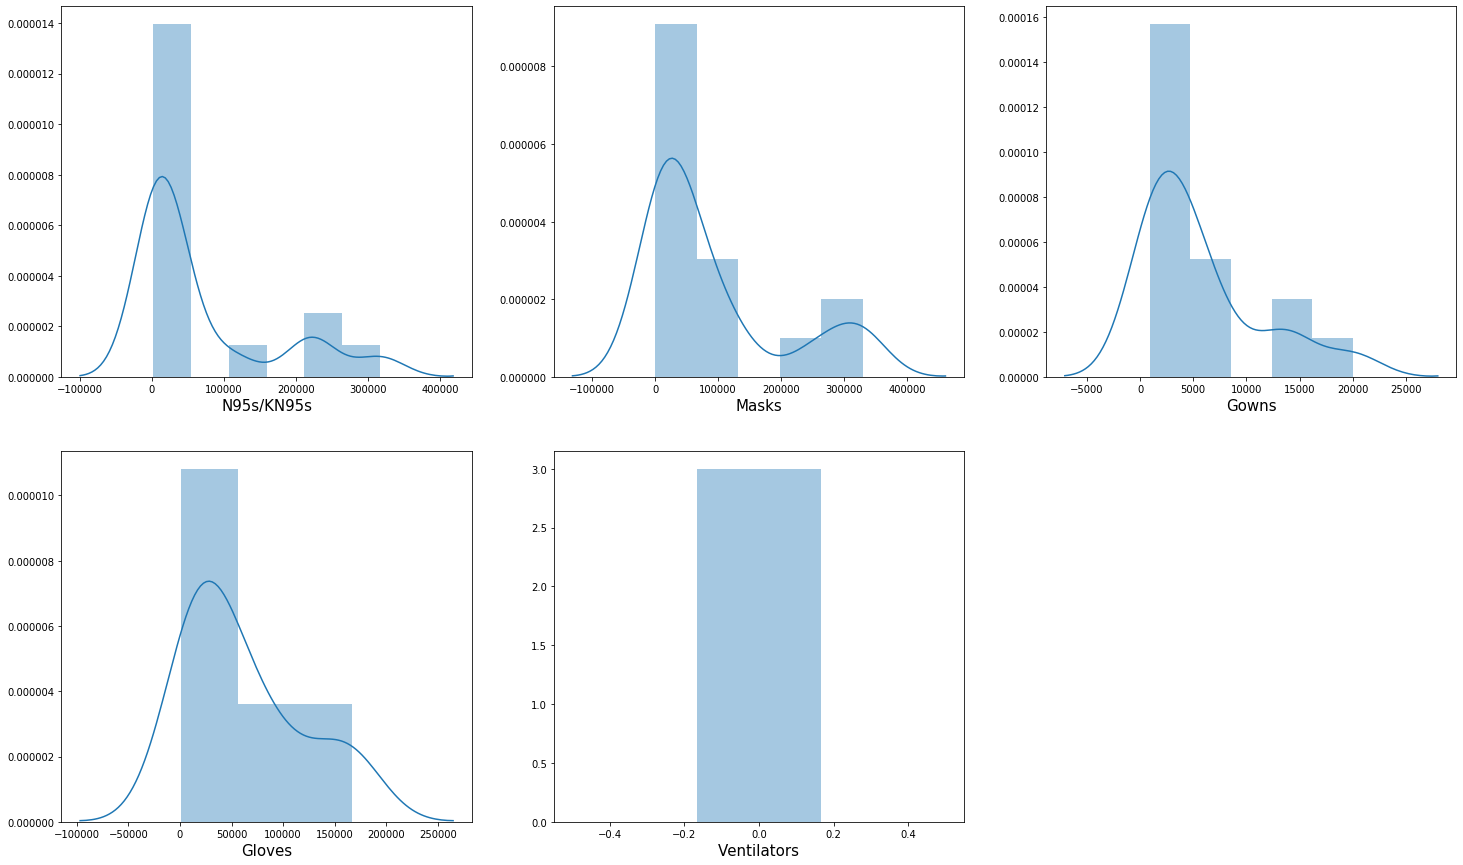

In [3]:
SM = df.loc[df['Region']=='Southeastern Massachusetts']
SM_CC = SM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    SM_CC['{} %'.format(category)] = SM_CC[category]/SM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(SM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
SM_CC

Distplot of PPE Growth

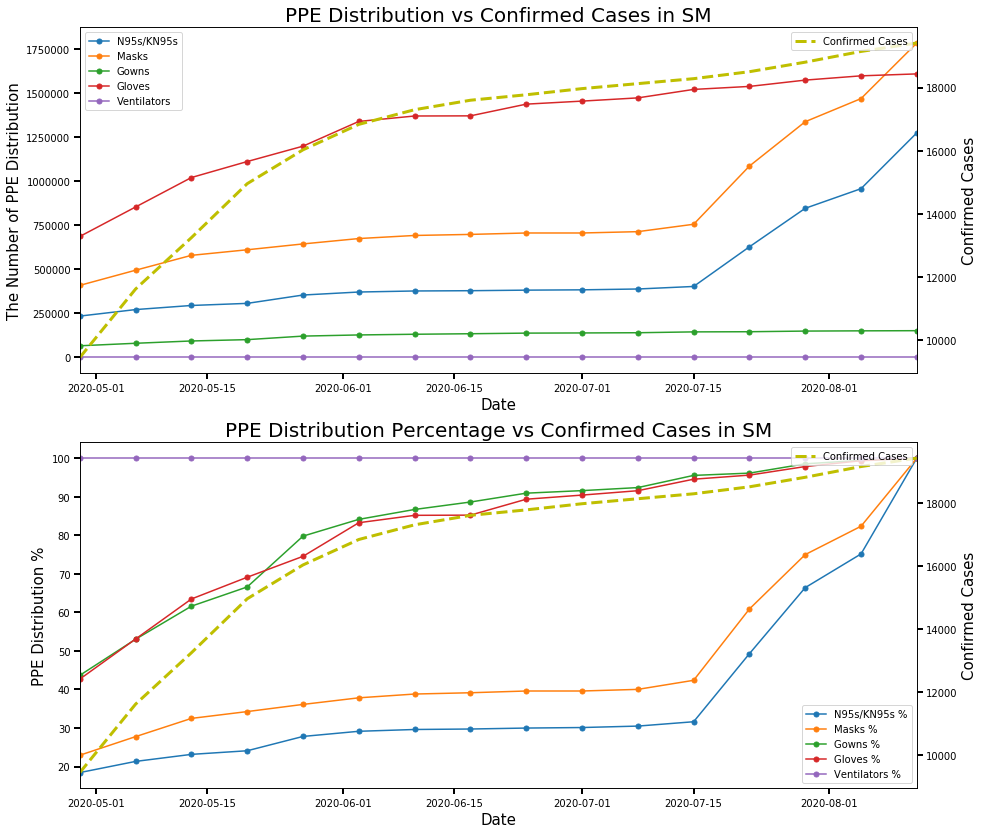

In [4]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=SM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in SM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=SM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=SM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in SM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=SM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    SM_CC['{} Ratio 1'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
SM_CC['Confirmed Cases(ma1)'] = SM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
SM_CC.iloc[0,-1] = (6065 + 9446) / 2
for category in categories:
    SM_CC['{} Ratio 2'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
SM_CC['Confirmed Cases(ma2)'] = SM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    SM_CC['{} Ratio 3'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
SM_CC['Confirmed Cases(ma3)'] = SM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
SM_CC.iloc[0,-1] = (6065+9446+11616)/3
for category in categories:
    SM_CC['{} Ratio 4'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    SM_CC['{} Ratio 5'.format(category)] = SM_CC[category].diff()/SM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    SM_CC['{} Ratio 6'.format(category)] = SM_CC[category].diff()/SM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
# SM_CC

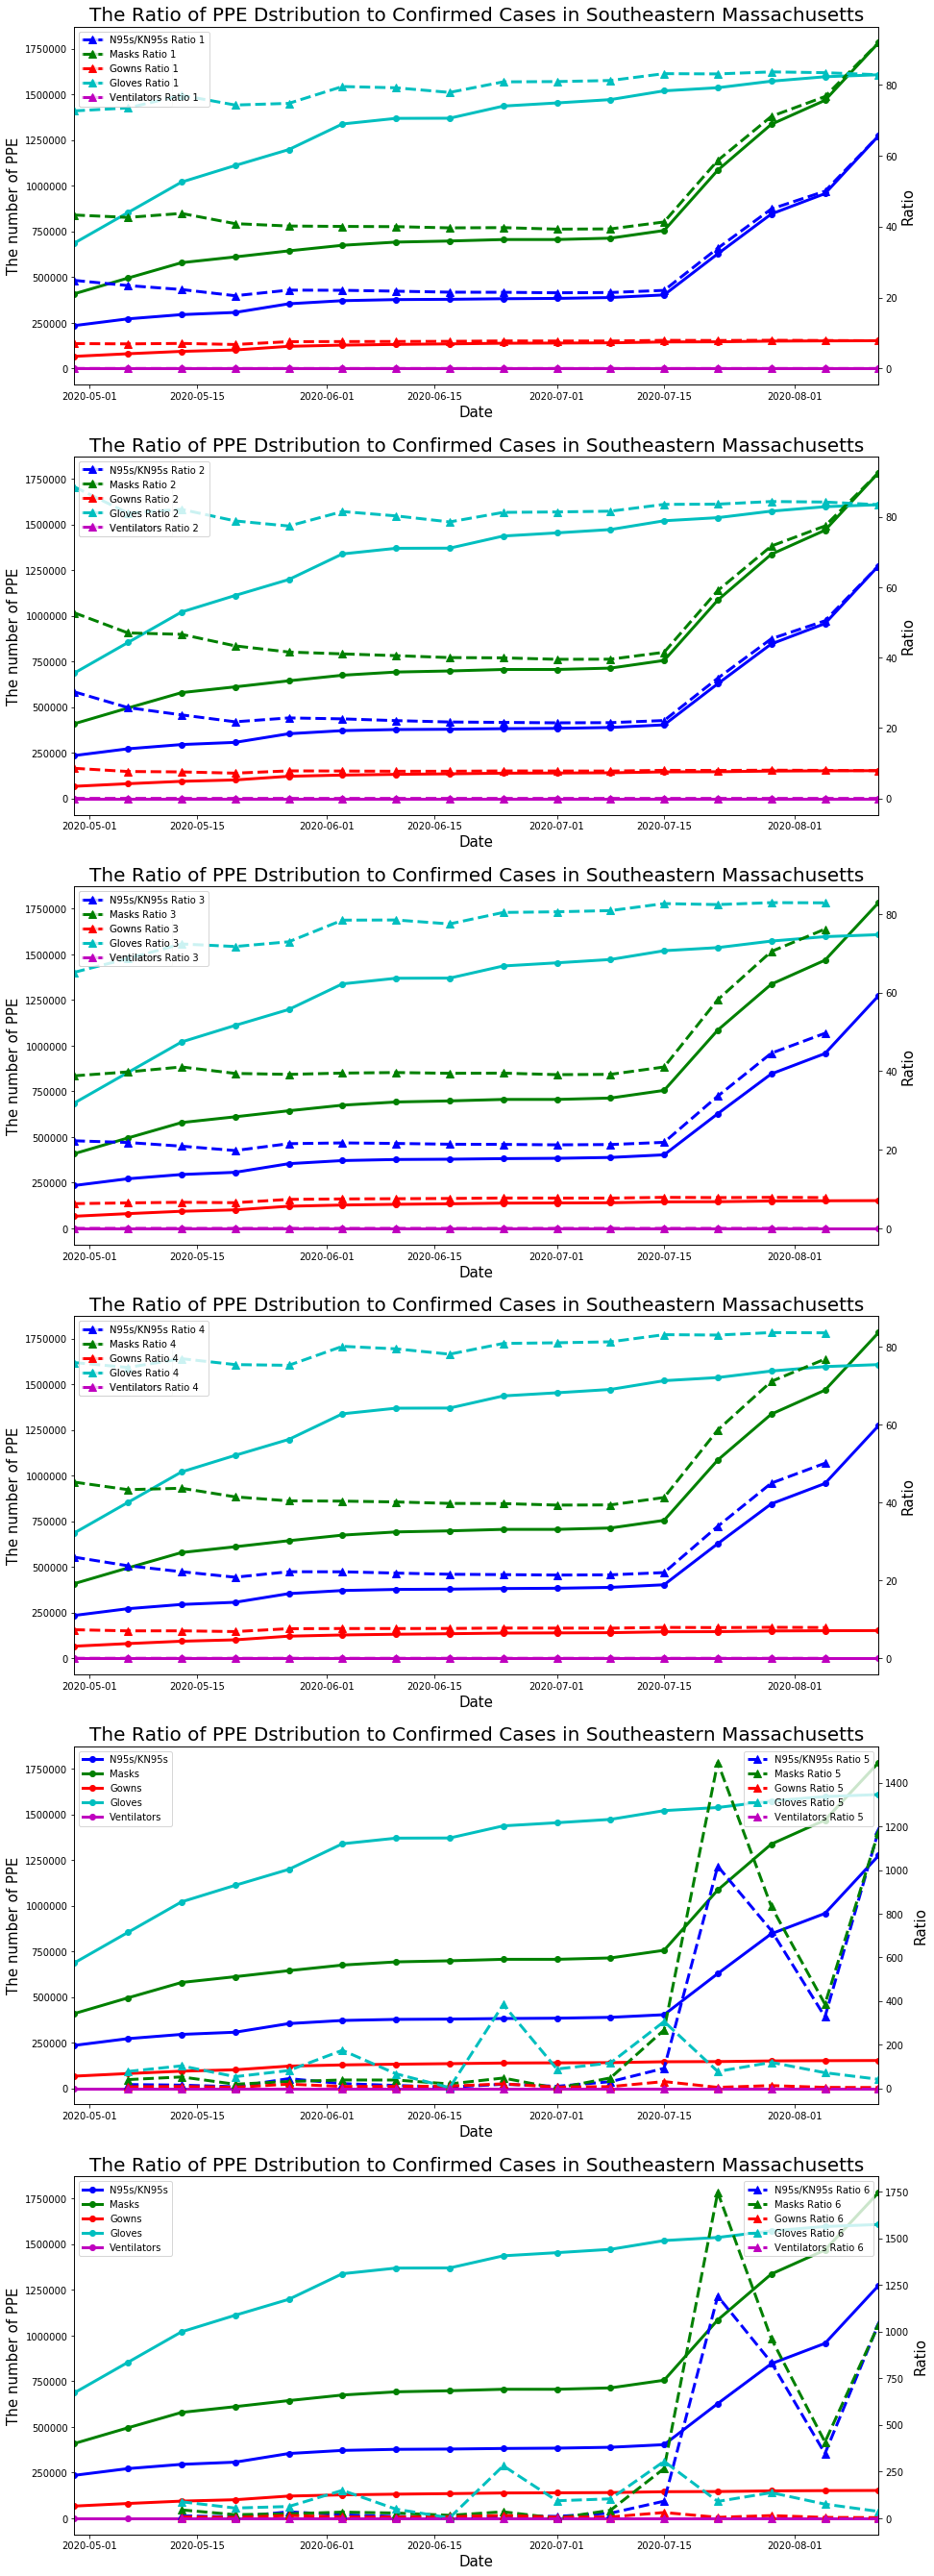

In [6]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=SM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Southeastern Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=SM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot(delta vs delta)')

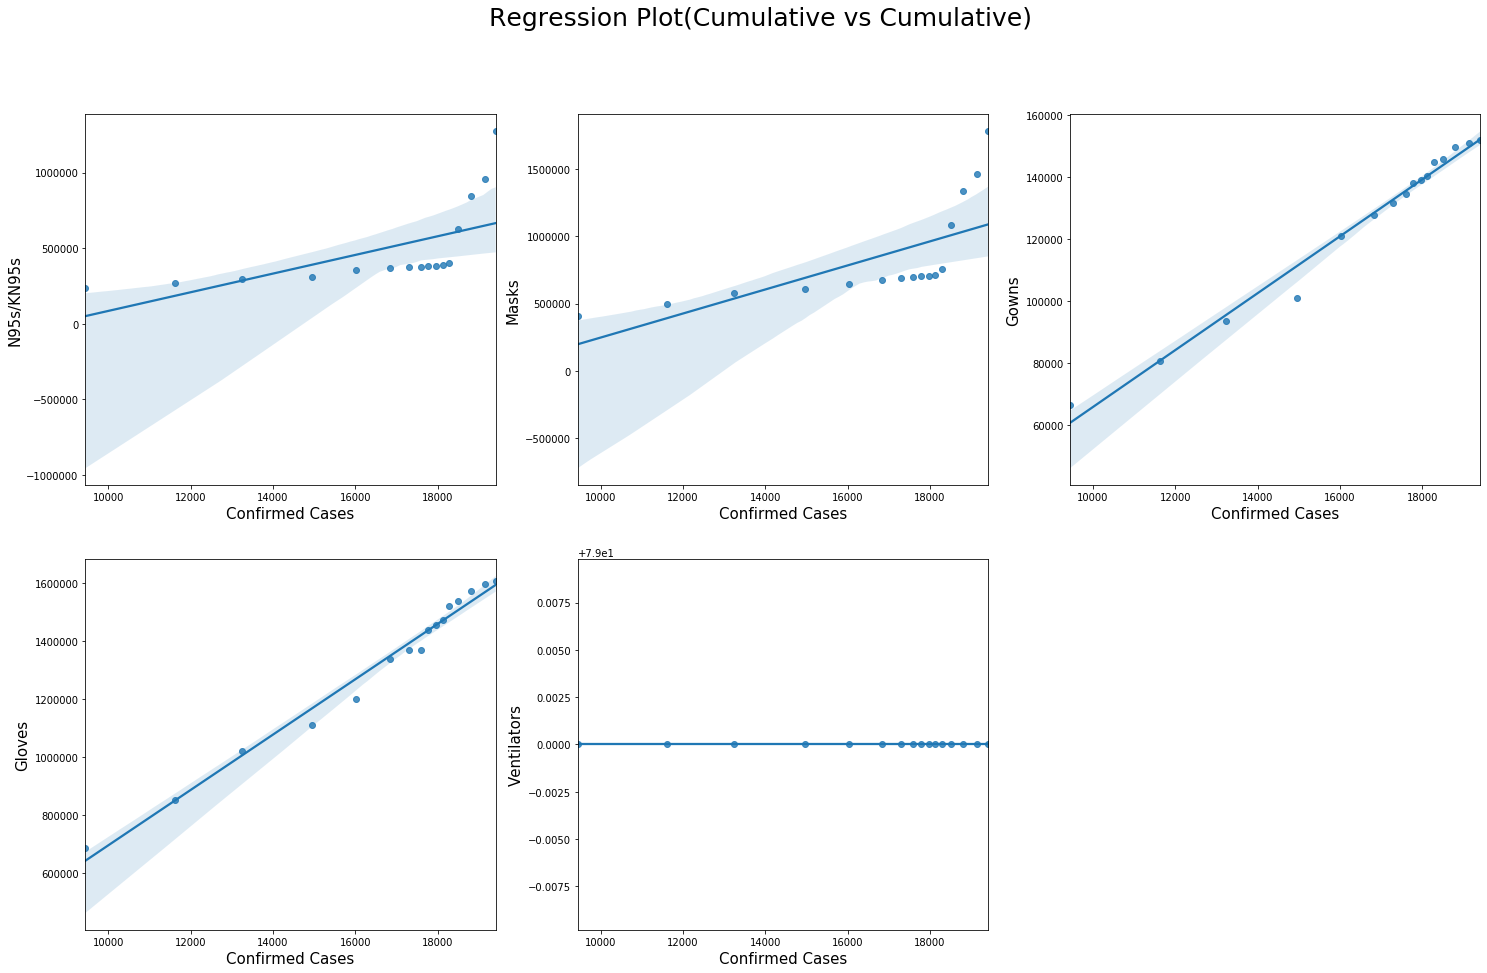

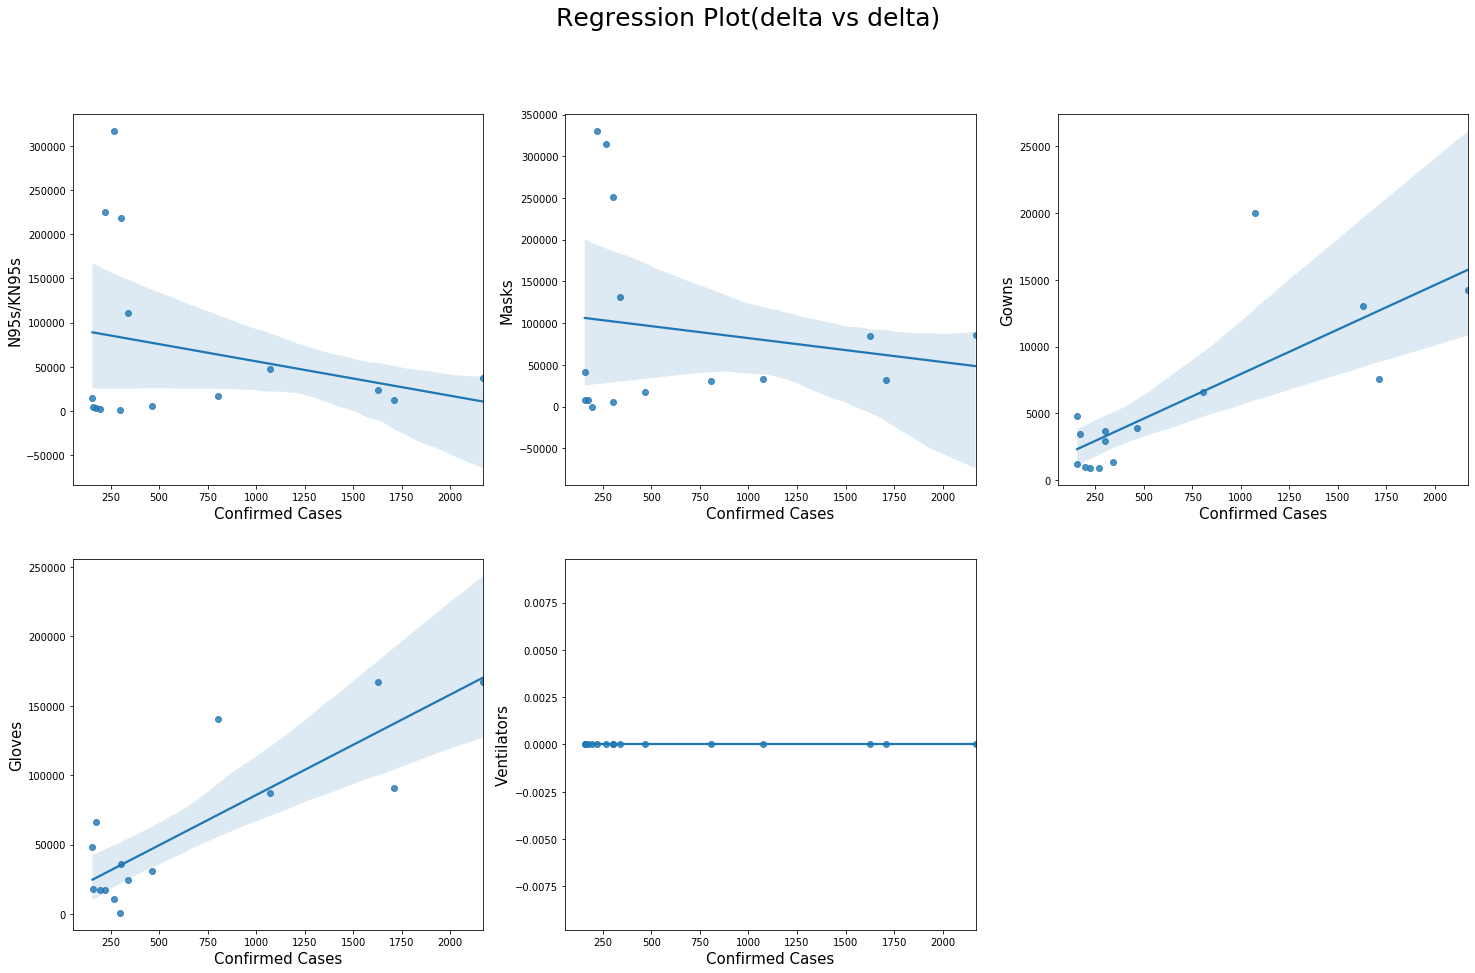

In [7]:
for category in categories:
    SM_CC['{} delta'.format(category)] = SM_CC[category].diff()
    SM_CC['Confirmed Cases delta'] = SM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=SM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot(Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=SM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot(delta vs delta)', fontsize=25)



In [8]:
# Regression Analysis
import statsmodels.api as sm

Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = SM_CC[category]
    X[categories.index(category)] = SM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     8.283
Date:                Thu, 13 Aug 2020   Prob (F-statistic):             0.0122
Time:                        17:46:03   Log-Likelihood:                -219.71
No. Observations:                  16   AIC:                             443.4
Df Residuals:                      14   BIC:                             445.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.318e+05    3.6e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Northeastern Massachusetts
### Northeastern Massachusetts is the region with the most confirmed cases number.

Time                      Region   N95s/KN95s      Masks    Gowns  \
120 2020-04-29  Northeastern Massachusetts   113720.000   226198.0  22974.0   
127 2020-05-06  Northeastern Massachusetts   144600.000   260413.0  27849.0   
134 2020-05-13  Northeastern Massachusetts   158983.000   297113.0  32024.0   
141 2020-05-20  Northeastern Massachusetts   164193.000   320263.0  35174.0   
148 2020-05-27  Northeastern Massachusetts   186775.000   339663.0  40604.0   
149 2020-06-03  Northeastern Massachusetts   193712.000   366013.0  42635.0   
150 2020-06-10  Northeastern Massachusetts   196071.000   375913.0  46315.0   
151 2020-06-17  Northeastern Massachusetts   198897.000   385913.0  49195.0   
152 2020-06-24  Northeastern Massachusetts   200936.000   390163.0  50520.0   
153 2020-07-01  Northeastern Massachusetts   201506.000   391063.0  50870.0   
154 2020-07-08  Northeastern Massachusetts   202526.000   392663.0  51370.0   
155 2020-07-15  Northeastern Massachusetts   207526.000   442163.0  52670.0   
156 2020-07-22  Northeastern Massachusetts   575436.000   857263.0  55670.0   
157 2020-07-29  Northeastern Massachusetts   876266.000  1225163.0  55820.0   
158 2020-08-05  Northeastern Massachusetts   891786.000  1242163.0  55920.0   
159 2020-08-12  Northeastern Massachusetts  1119235.941  1473313.0  56270.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
120  335932.0        117.0          14920.0     10.160503   15.353017   
127  427832.0        117.0          18056.0     12.919528   17.675334   
134  514032.0        117.0          20158.0     14.204601   20.166319   
141  559032.0        117.0          22088.0     14.670097   21.737608   
148  614332.0        117.0          23370.0     16.687724   23.054368   
149  688832.0        117.0          24334.0     17.307521   24.842854   
150  700832.0        117.0          25003.0     17.518290   25.514809   
151  703632.0        117.0          25424.0     17.770784   26.193552   
152  726632.0        117.0          25734.0     17.952962   26.482017   
153  730632.0        117.0          26022.0     18.003889   26.543104   
154  731132.0        117.0          26316.0     18.095023   26.651703   
155  739632.0        117.0          26659.0     18.541756   30.011478   
156  744632.0        117.0          26969.0     51.413288   58.186075   
157  744632.0        117.0          27346.0     78.291446   83.157007   
158  746632.0        117.0          27934.0     79.678106   84.310869   
159  761992.0        117.0          28416.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  
120   40.828150   44.086027          100.0  
127   49.491736   56.146521          100.0  
134   56.911320   67.458976          100.0  
141   62.509330   73.364550          100.0  
148   72.159232   80.621844          100.0  
149   75.768616   90.398849          100.0  
150   82.308513   91.973669          100.0  
151   87.426693   92.341127          100.0  
152   89.781411   95.359531          100.0  
153   90.403412   95.884471          100.0  
154   91.291985   95.950089          100.0  
155   93.602275   97.065586          100.0  
156   98.933712   97.721761          100.0  
157   99.200284   97.721761          100.0  
158   99.377999   97.984231          100.0  
159  100.000000  100.000000          100.0

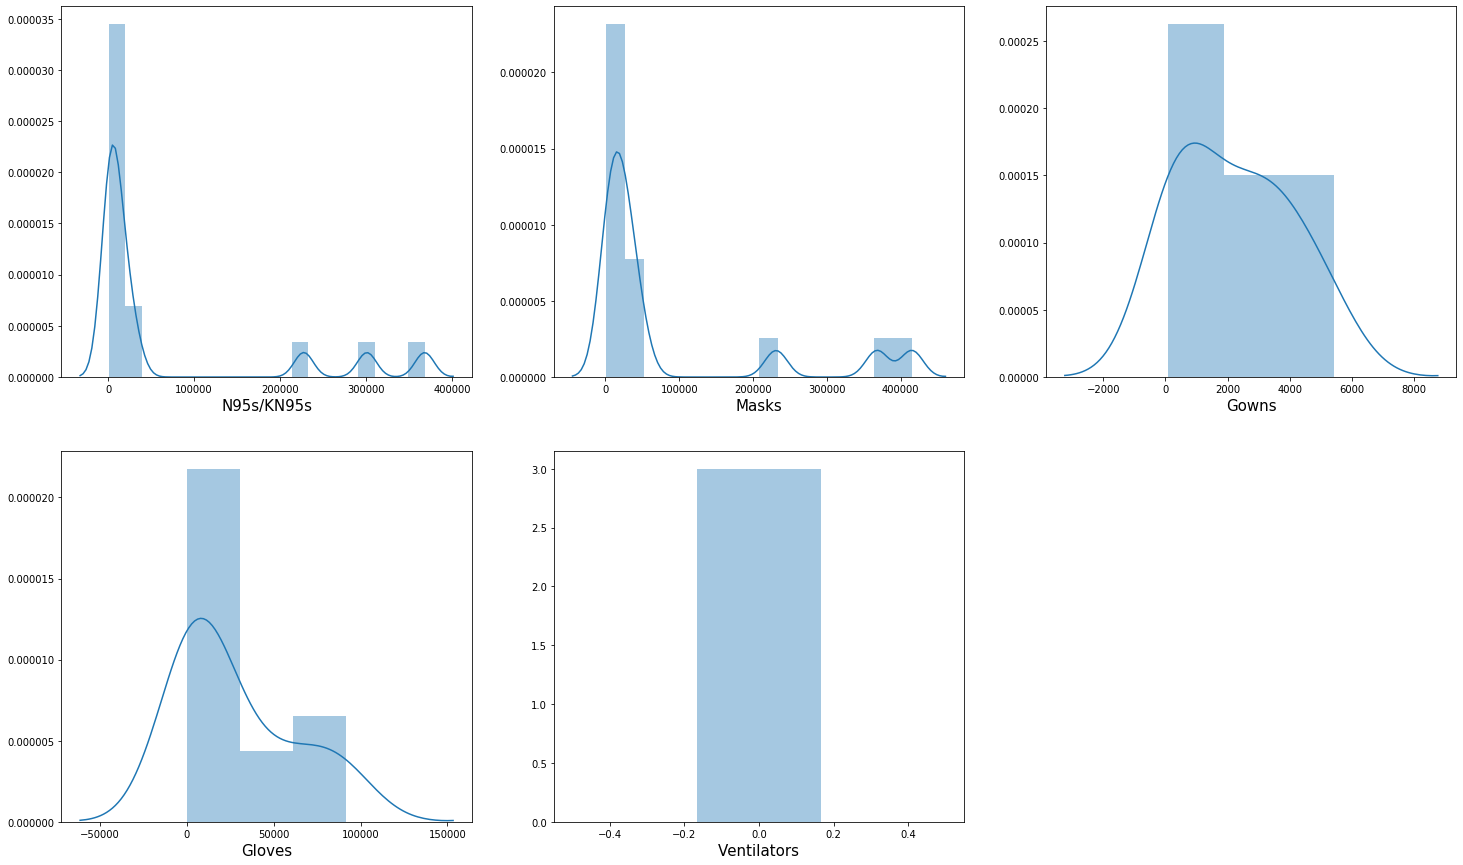

In [9]:
NM = df.loc[df['Region']=='Northeastern Massachusetts']
NM_CC = NM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    NM_CC['{} %'.format(category)] = NM_CC[category]/NM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(NM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
NM_CC

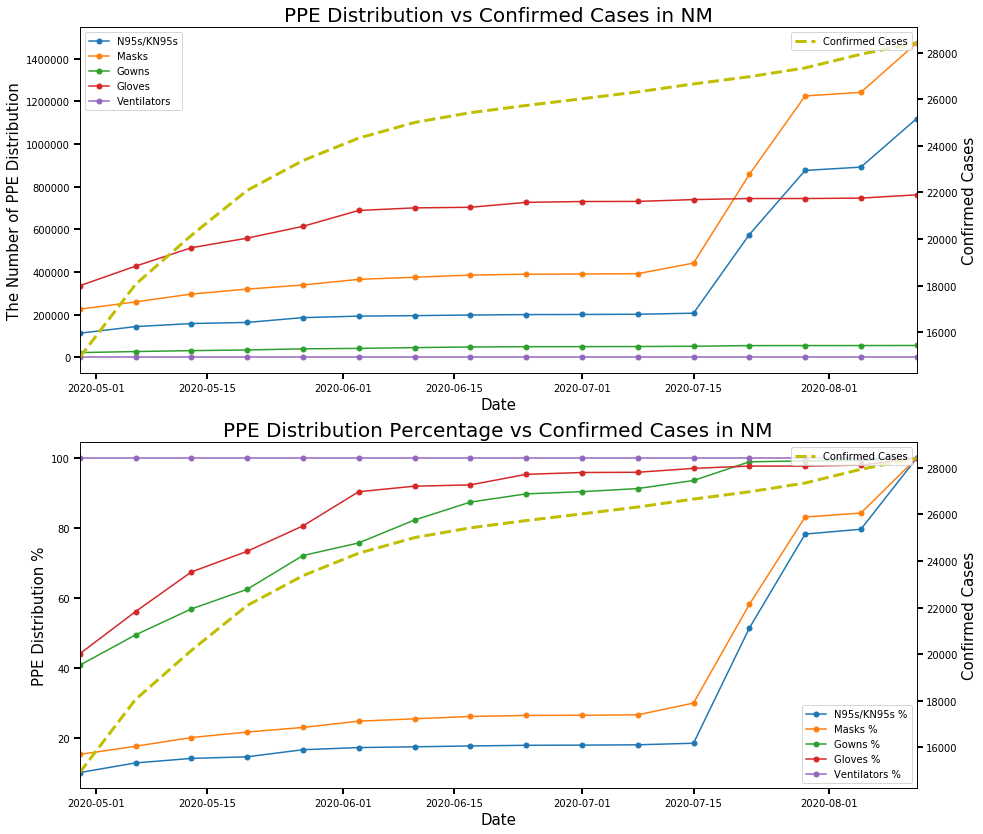

In [10]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=NM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in NM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=NM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=NM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in NM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=NM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [11]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    NM_CC['{} Ratio 1'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
NM_CC['Confirmed Cases(ma1)'] = NM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
NM_CC.iloc[0,-1] = (10641+14920) / 2
for category in categories:
    NM_CC['{} Ratio 2'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
NM_CC['Confirmed Cases(ma2)'] = NM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    NM_CC['{} Ratio 3'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
NM_CC['Confirmed Cases(ma3)'] = NM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
NM_CC.iloc[0,-1] = (10641+14920+18056)/3
for category in categories:
    NM_CC['{} Ratio 4'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    NM_CC['{} Ratio 5'.format(category)] = NM_CC[category].diff()/NM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    NM_CC['{} Ratio 6'.format(category)] = NM_CC[category].diff()/NM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
NM_CC

Time                      Region   N95s/KN95s      Masks    Gowns  \
120 2020-04-29  Northeastern Massachusetts   113720.000   226198.0  22974.0   
127 2020-05-06  Northeastern Massachusetts   144600.000   260413.0  27849.0   
134 2020-05-13  Northeastern Massachusetts   158983.000   297113.0  32024.0   
141 2020-05-20  Northeastern Massachusetts   164193.000   320263.0  35174.0   
148 2020-05-27  Northeastern Massachusetts   186775.000   339663.0  40604.0   
149 2020-06-03  Northeastern Massachusetts   193712.000   366013.0  42635.0   
150 2020-06-10  Northeastern Massachusetts   196071.000   375913.0  46315.0   
151 2020-06-17  Northeastern Massachusetts   198897.000   385913.0  49195.0   
152 2020-06-24  Northeastern Massachusetts   200936.000   390163.0  50520.0   
153 2020-07-01  Northeastern Massachusetts   201506.000   391063.0  50870.0   
154 2020-07-08  Northeastern Massachusetts   202526.000   392663.0  51370.0   
155 2020-07-15  Northeastern Massachusetts   207526.000   442163.0  52670.0   
156 2020-07-22  Northeastern Massachusetts   575436.000   857263.0  55670.0   
157 2020-07-29  Northeastern Massachusetts   876266.000  1225163.0  55820.0   
158 2020-08-05  Northeastern Massachusetts   891786.000  1242163.0  55920.0   
159 2020-08-12  Northeastern Massachusetts  1119235.941  1473313.0  56270.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
120  335932.0        117.0          14920.0     10.160503   15.353017   
127  427832.0        117.0          18056.0     12.919528   17.675334   
134  514032.0        117.0          20158.0     14.204601   20.166319   
141  559032.0        117.0          22088.0     14.670097   21.737608   
148  614332.0        117.0          23370.0     16.687724   23.054368   
149  688832.0        117.0          24334.0     17.307521   24.842854   
150  700832.0        117.0          25003.0     17.518290   25.514809   
151  703632.0        117.0          25424.0     17.770784   26.193552   
152  726632.0        117.0          25734.0     17.952962   26.482017   
153  730632.0        117.0          26022.0     18.003889   26.543104   
154  731132.0        117.0          26316.0     18.095023   26.651703   
155  739632.0        117.0          26659.0     18.541756   30.011478   
156  744632.0        117.0          26969.0     51.413288   58.186075   
157  744632.0        117.0          27346.0     78.291446   83.157007   
158  746632.0        117.0          27934.0     79.678106   84.310869   
159  761992.0        117.0          28416.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
120   40.828150   44.086027          100.0            7.621984      15.160724   
127   49.491736   56.146521          100.0            8.008418      14.422519   
134   56.911320   67.458976          100.0            7.886844      14.739210   
141   62.509330   73.364550          100.0            7.433584      14.499411   
148   72.159232   80.621844          100.0            7.992084      14.534146   
149   75.768616   90.398849          100.0            7.960549      15.041218   
150   82.308513   91.973669          100.0            7.841899      15.034716   
151   87.426693   92.341127          100.0            7.823199      15.179083   
152   89.781411   95.359531          100.0            7.808191      15.161382   
153   90.403412   95.884471          100.0            7.743678      15.028168   
154   91.291985   95.950089          100.0            7.695926      14.921075   
155   93.602275   97.065586          100.0            7.784463      16.585881   
156   98.933712   97.721761          100.0           21.336942      31.786978   
157   99.200284   97.721761          100.0           32.043663      44.802275   
158   99.377999   97.984231          100.0           31.924751      44.467781   
159  100.000000  100.000000          100.0           39.387526      51.848008   

     Gowns Ratio 1  Gloves Ratio 1  Ventilator

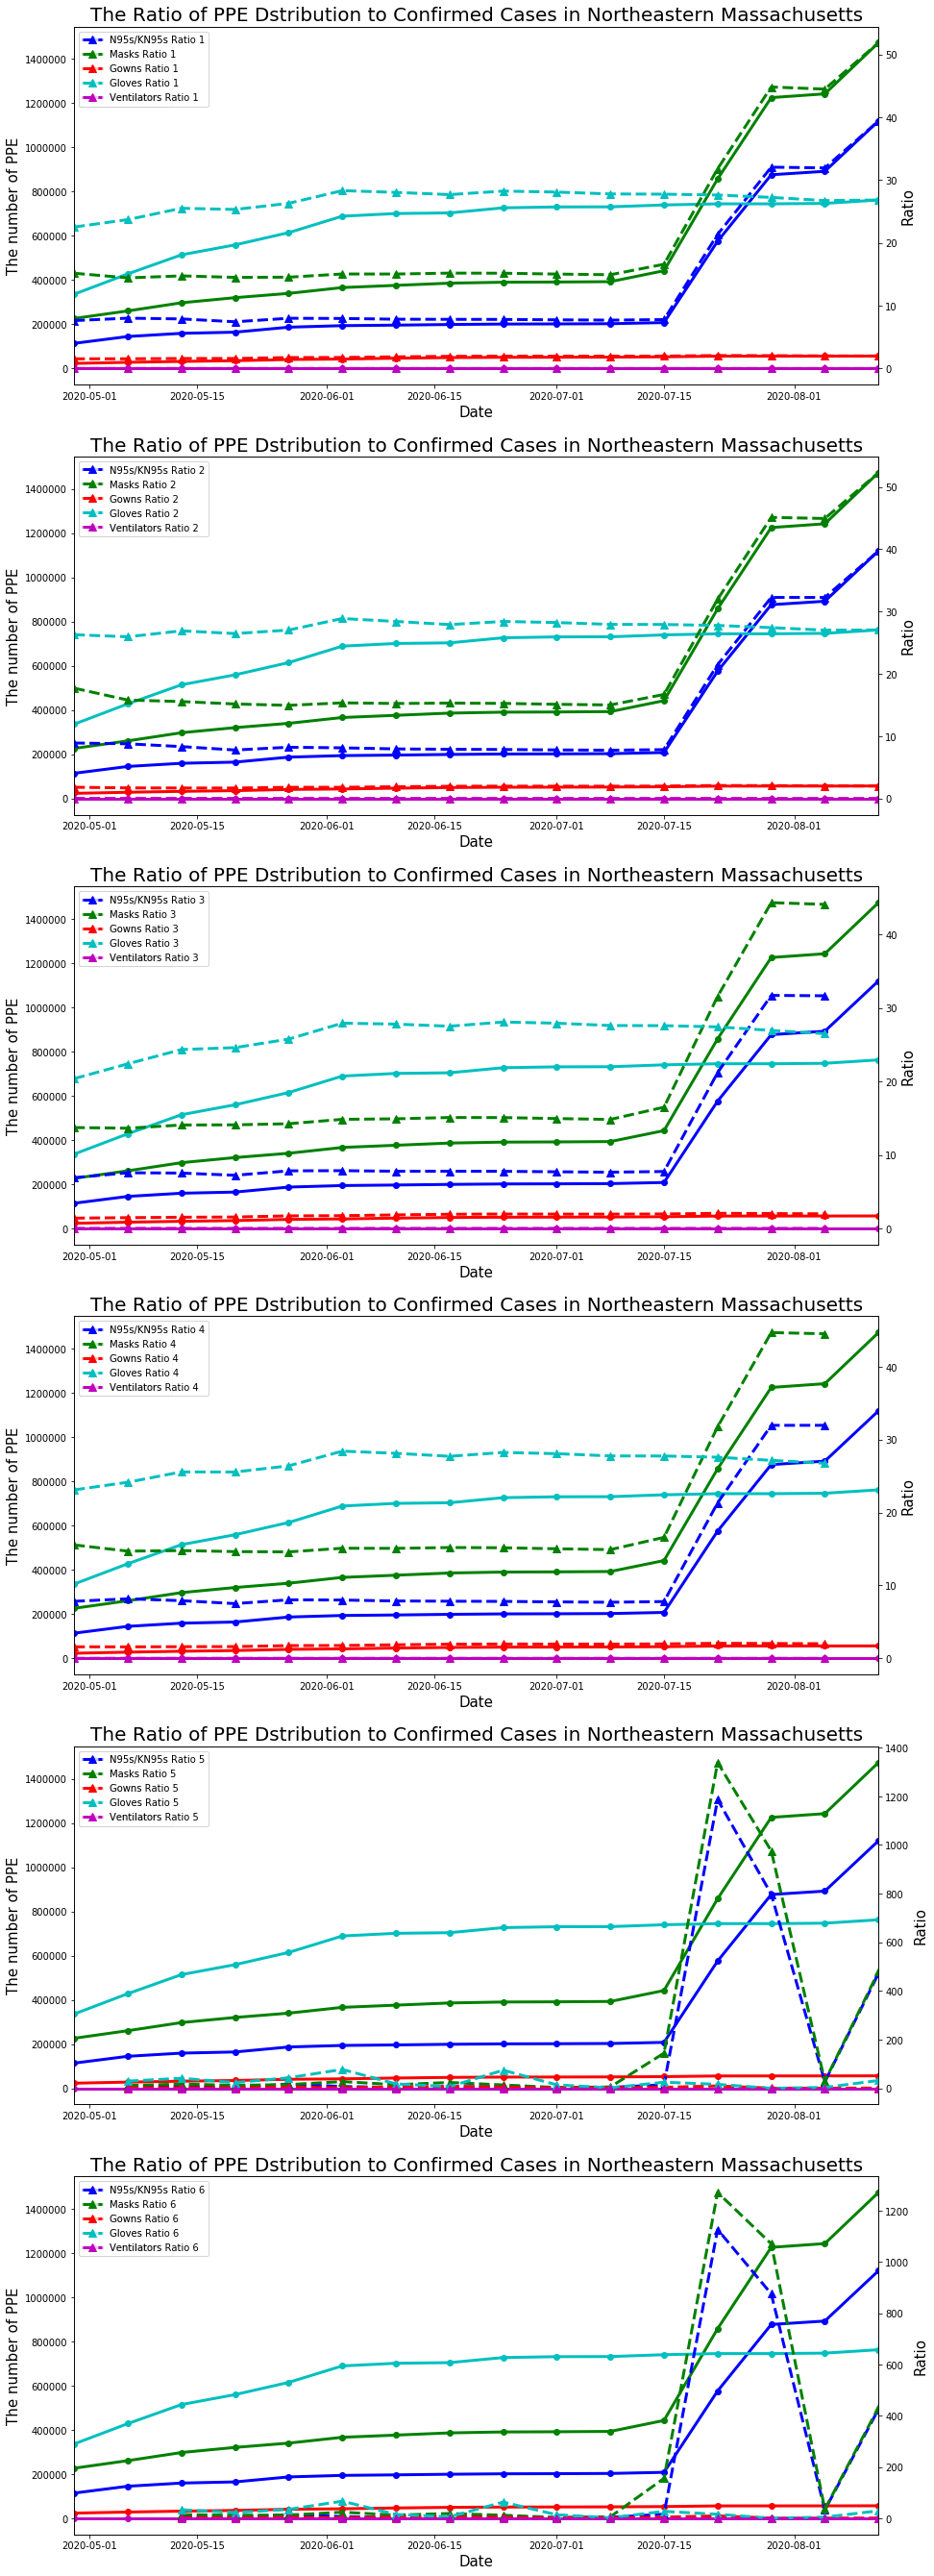

In [12]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=NM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Northeastern Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=NM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

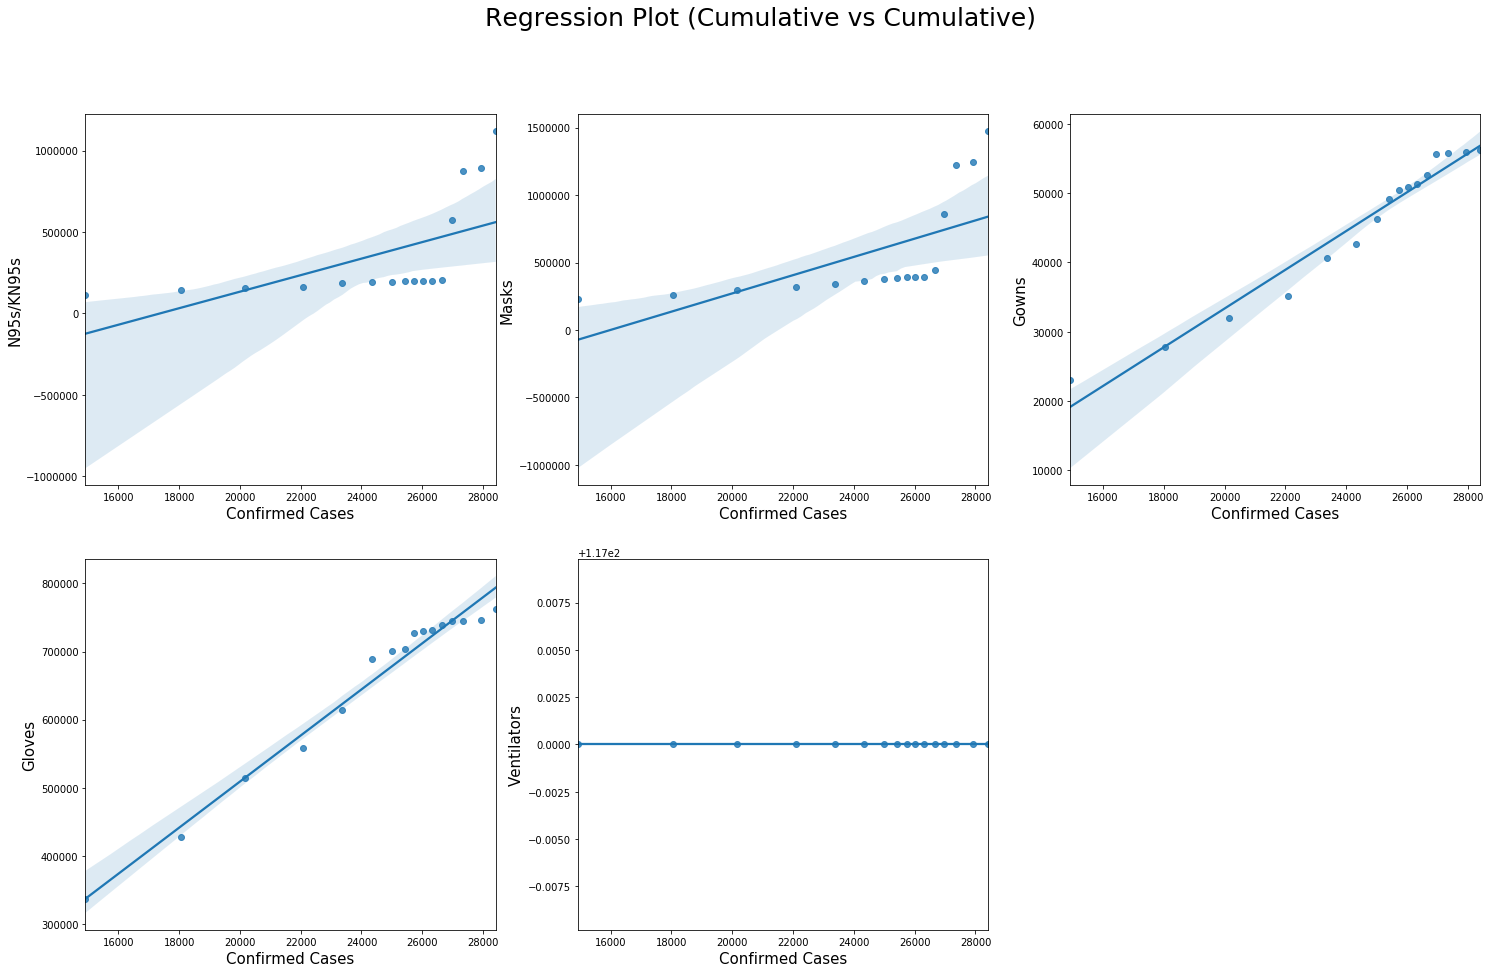

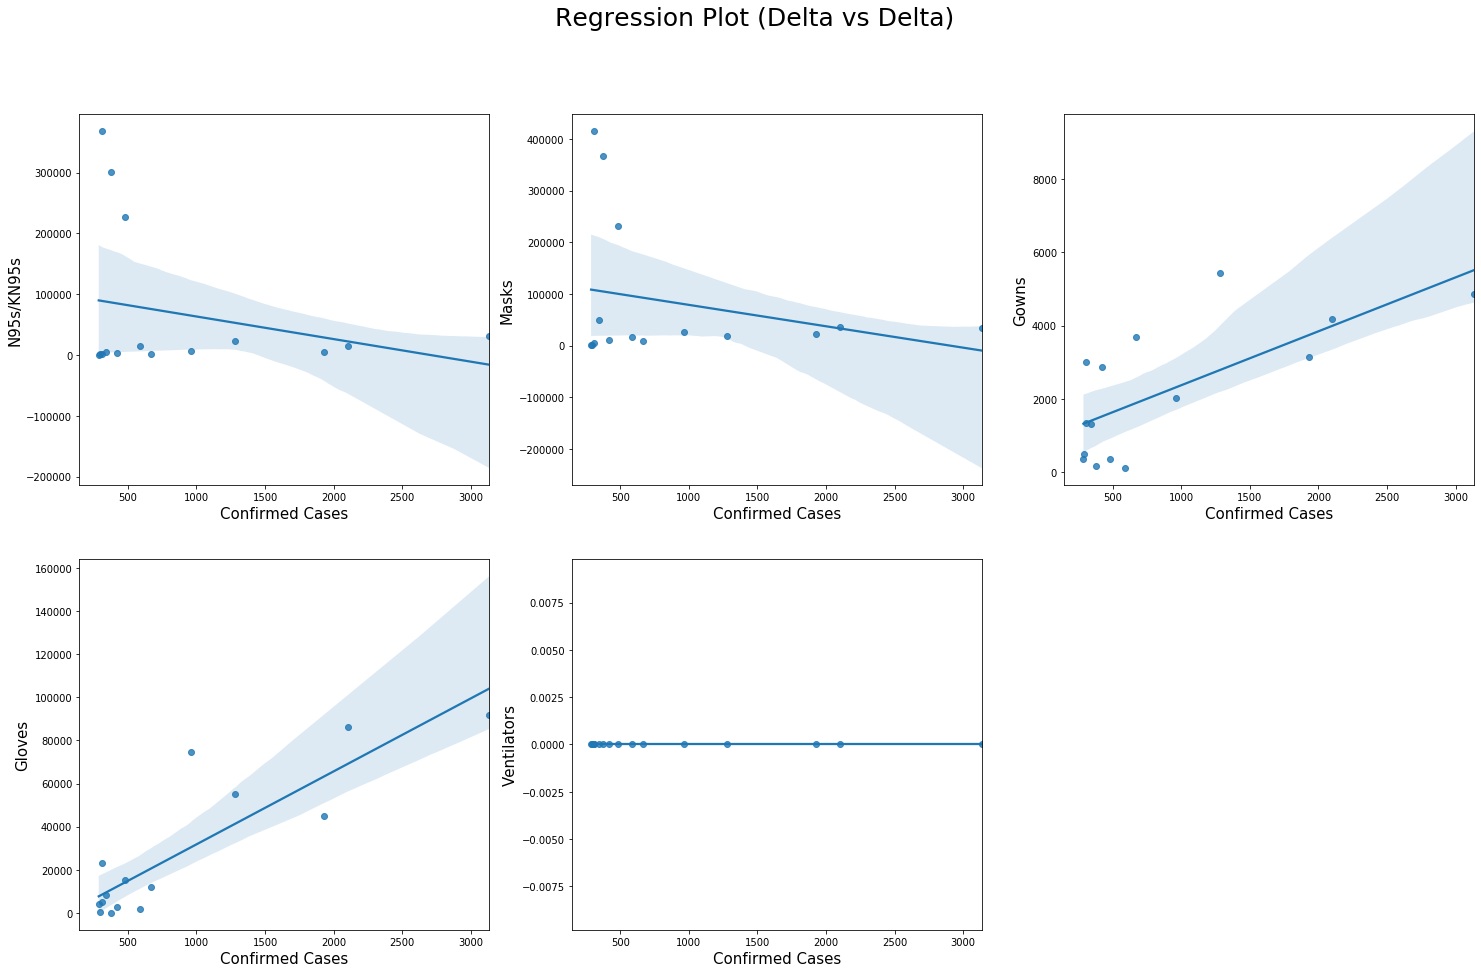

In [13]:
for category in categories:
    NM_CC['{} delta'.format(category)] = NM_CC[category].diff()
    NM_CC['Confirmed Cases delta'] = NM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=NM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=NM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [14]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = NM_CC[category]
    X[categories.index(category)] = NM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     7.551
Date:                Thu, 13 Aug 2020   Prob (F-statistic):             0.0157
Time:                        17:46:09   Log-Likelihood:                -221.71
No. Observations:                  16   AIC:                             447.4
Df Residuals:                      14   BIC:                             449.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.816e+05   4.54e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Metro West
### Metro West is the region with the most deaths number.

Time      Region   N95s/KN95s      Masks     Gowns     Gloves  \
80  2020-04-29  Metro West   212466.000   373412.0   50610.0   372180.0   
87  2020-05-06  Metro West   292073.000   475762.0   55812.0   592330.0   
94  2020-05-13  Metro West   336159.000   564732.0   71127.0   701630.0   
101 2020-05-20  Metro West   380619.000   610582.0   88237.0   870902.0   
108 2020-05-27  Metro West   449855.000   661482.0  128047.0   977602.0   
109 2020-06-03  Metro West   463396.000   687532.0  135759.0  1052774.0   
110 2020-06-10  Metro West   479836.000   722682.0  145989.0  1121074.0   
111 2020-06-17  Metro West   486648.000   724682.0  148709.0  1182274.0   
112 2020-06-24  Metro West   514245.000   730682.0  150139.0  1188574.0   
113 2020-07-01  Metro West   516985.000   737682.0  154039.0  1233574.0   
114 2020-07-08  Metro West   518680.000   737682.0  160914.0  1246574.0   
115 2020-07-15  Metro West   535320.000   783032.0  162441.0  1319174.0   
116 2020-07-22  Metro West   978560.000  1232432.0  163441.0  1319574.0   
117 2020-07-29  Metro West  1221330.188  1510082.0  169731.0  1358574.0   
118 2020-08-05  Metro West  1229780.188  1538182.0  172781.0  1368374.0   
119 2020-08-12  Metro West  1555340.188  1880582.0  173181.0  1379534.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
80         136.0          12601.0     13.660420   19.856193   29.223760   
87         136.0          14825.0     18.778721   25.298658   32.227554   
94         136.0          16491.0     21.613214   30.029640   41.070903   
101        136.0          17755.0     24.471752   32.467715   50.950739   
108        136.0          18580.0     28.923254   35.174324   73.938250   
109        136.0          19245.0     29.793868   36.559533   78.391394   
110        136.0          19490.0     30.850871   38.428635   84.298508   
111        136.0          19706.0     31.288846   38.534985   85.869120   
112        136.0          19906.0     33.063185   38.854036   86.694845   
113        136.0          20047.0     33.239352   39.226261   88.946824   
114        136.0          20195.0     33.348331   39.226261   92.916659   
115        136.0          20346.0     34.418194   41.637748   93.798396   
116        136.0          20589.0     62.916139   65.534606   94.375826   
117        136.0          20880.0     78.524955   80.298652   98.007865   
118        136.0          21274.0     79.068245   81.792871   99.769028   
119        136.0          21530.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  
80    26.978675          100.0  
87    42.936963          100.0  
94    50.859928          100.0  
101   63.130158          100.0  
108   70.864654          100.0  
109   76.313741          100.0  
110   81.264688          100.0  
111   85.700969          100.0  
112   86.157645          100.0  
113   89.419616          100.0  
114   90.361963          100.0  
115   95.624609          100.0  
116   95.653605          100.0  
117   98.480646          100.0  
118   99.191031          100.0  
119  100.000000          100.0

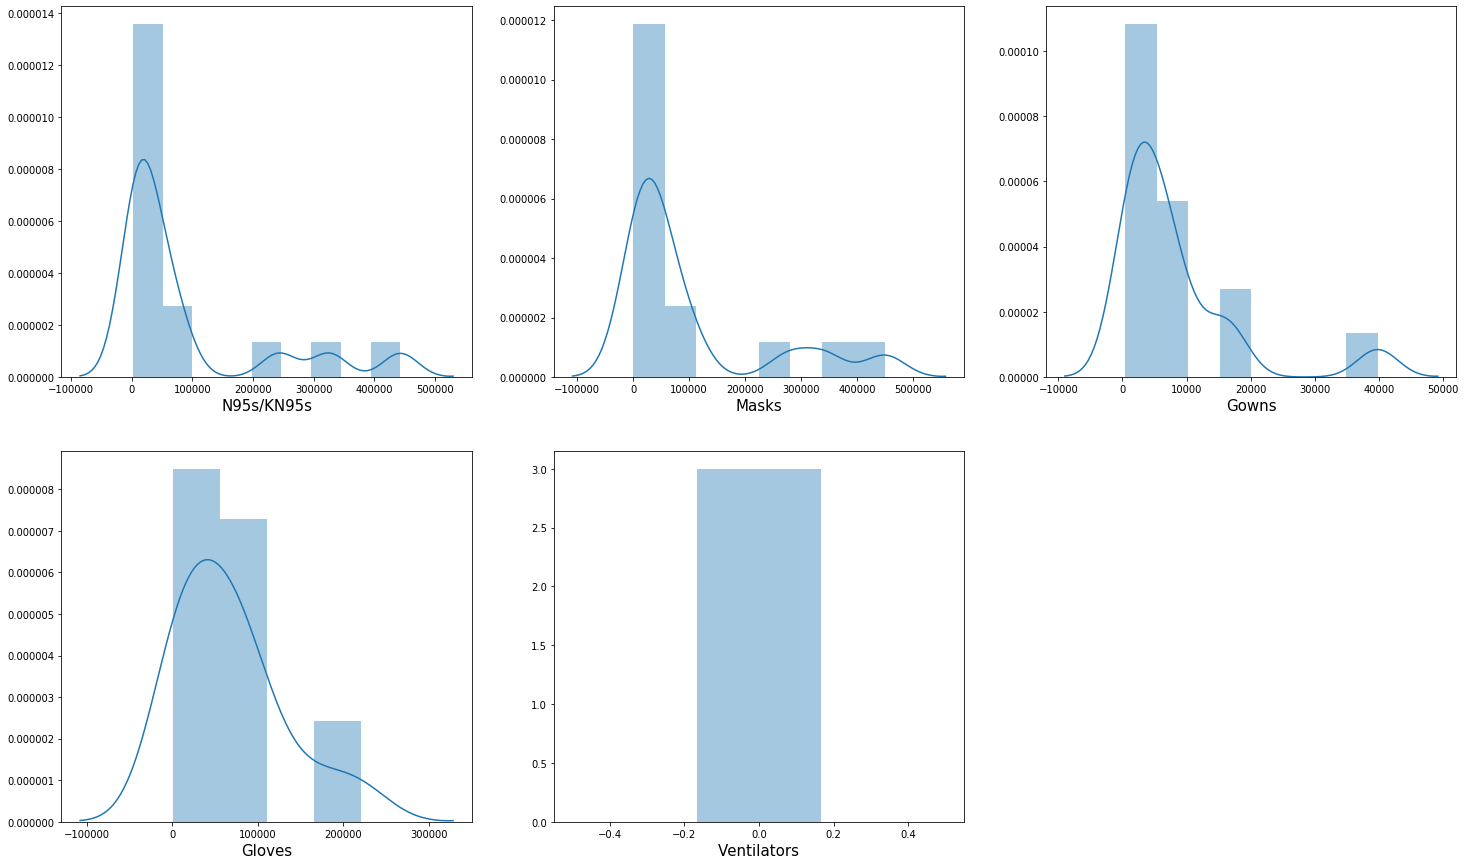

In [15]:
MW = df.loc[df['Region']=='Metro West']
MW_CC = MW.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    MW_CC['{} %'.format(category)] = MW_CC[category]/MW_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(MW_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
MW_CC

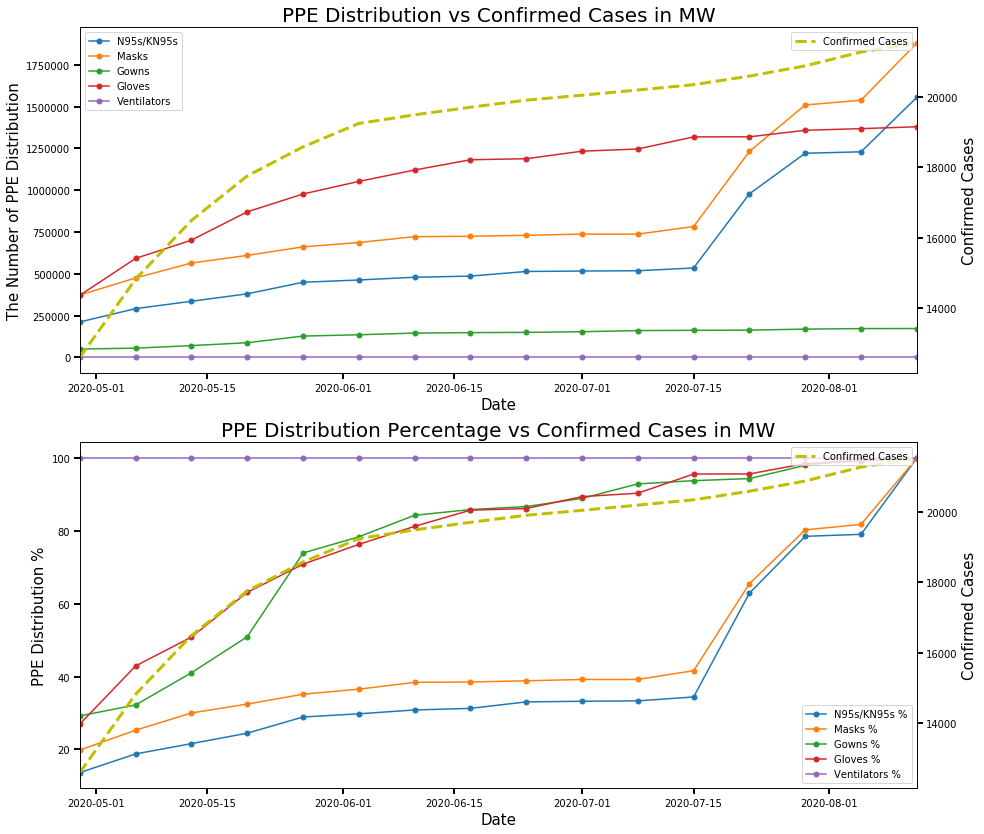

In [16]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=MW_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MW', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=MW_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=MW_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in MW', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=MW_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [17]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    MW_CC['{} Ratio 1'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
MW_CC['Confirmed Cases(ma1)'] = MW_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
MW_CC.iloc[0,-1] = (9219+12601) / 2
for category in categories:
    MW_CC['{} Ratio 2'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
MW_CC['Confirmed Cases(ma2)'] = MW_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    MW_CC['{} Ratio 3'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
MW_CC['Confirmed Cases(ma3)'] = MW_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
MW_CC.iloc[0,-1] = (9219+12601+14825)/3
for category in categories:
    MW_CC['{} Ratio 4'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    MW_CC['{} Ratio 5'.format(category)] = MW_CC[category].diff()/MW_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    MW_CC['{} Ratio 6'.format(category)] = MW_CC[category].diff()/MW_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
MW_CC

Time      Region   N95s/KN95s      Masks     Gowns     Gloves  \
80  2020-04-29  Metro West   212466.000   373412.0   50610.0   372180.0   
87  2020-05-06  Metro West   292073.000   475762.0   55812.0   592330.0   
94  2020-05-13  Metro West   336159.000   564732.0   71127.0   701630.0   
101 2020-05-20  Metro West   380619.000   610582.0   88237.0   870902.0   
108 2020-05-27  Metro West   449855.000   661482.0  128047.0   977602.0   
109 2020-06-03  Metro West   463396.000   687532.0  135759.0  1052774.0   
110 2020-06-10  Metro West   479836.000   722682.0  145989.0  1121074.0   
111 2020-06-17  Metro West   486648.000   724682.0  148709.0  1182274.0   
112 2020-06-24  Metro West   514245.000   730682.0  150139.0  1188574.0   
113 2020-07-01  Metro West   516985.000   737682.0  154039.0  1233574.0   
114 2020-07-08  Metro West   518680.000   737682.0  160914.0  1246574.0   
115 2020-07-15  Metro West   535320.000   783032.0  162441.0  1319174.0   
116 2020-07-22  Metro West   978560.000  1232432.0  163441.0  1319574.0   
117 2020-07-29  Metro West  1221330.188  1510082.0  169731.0  1358574.0   
118 2020-08-05  Metro West  1229780.188  1538182.0  172781.0  1368374.0   
119 2020-08-12  Metro West  1555340.188  1880582.0  173181.0  1379534.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
80         136.0          12601.0     13.660420   19.856193   29.223760   
87         136.0          14825.0     18.778721   25.298658   32.227554   
94         136.0          16491.0     21.613214   30.029640   41.070903   
101        136.0          17755.0     24.471752   32.467715   50.950739   
108        136.0          18580.0     28.923254   35.174324   73.938250   
109        136.0          19245.0     29.793868   36.559533   78.391394   
110        136.0          19490.0     30.850871   38.428635   84.298508   
111        136.0          19706.0     31.288846   38.534985   85.869120   
112        136.0          19906.0     33.063185   38.854036   86.694845   
113        136.0          20047.0     33.239352   39.226261   88.946824   
114        136.0          20195.0     33.348331   39.226261   92.916659   
115        136.0          20346.0     34.418194   41.637748   93.798396   
116        136.0          20589.0     62.916139   65.534606   94.375826   
117        136.0          20880.0     78.524955   80.298652   98.007865   
118        136.0          21274.0     79.068245   81.792871   99.769028   
119        136.0          21530.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
80    26.978675          100.0           16.861043      29.633521   
87    42.936963          100.0           19.701383      32.091872   
94    50.859928          100.0           20.384391      34.244861   
101   63.130158          100.0           21.437285      34.389299   
108   70.864654          100.0           24.211787      35.601830   
109   76.313741          100.0           24.078774      35.725227   
110   81.264688          100.0           24.619600      37.079631   
111   85.700969          100.0           24.695423      36.774688   
112   86.157645          100.0           25.833668      36.706621   
113   89.419616          100.0           25.788647      36.797626   
114   90.361963          100.0           25.683585      36.527952   
115   95.624609          100.0           26.310823      38.485796   
116   95.653605          100.0           47.528292      59.858760   
117   98.480646          100.0           58.492825      72.321935   
118   99.191031          100.0           57.806721      72.303375   
119  100.000000          100.0           72.240603      87.347051   

     Gowns Ratio 1  Gloves Ratio 1  Ventilators Ratio 1  Confirmed Cases(ma1)  \
80        4.016348       29.535751             0.010793               10910.0   
87        3.764722       39.954806             0.009174               13713.0   
94        4.313080       42.546237       

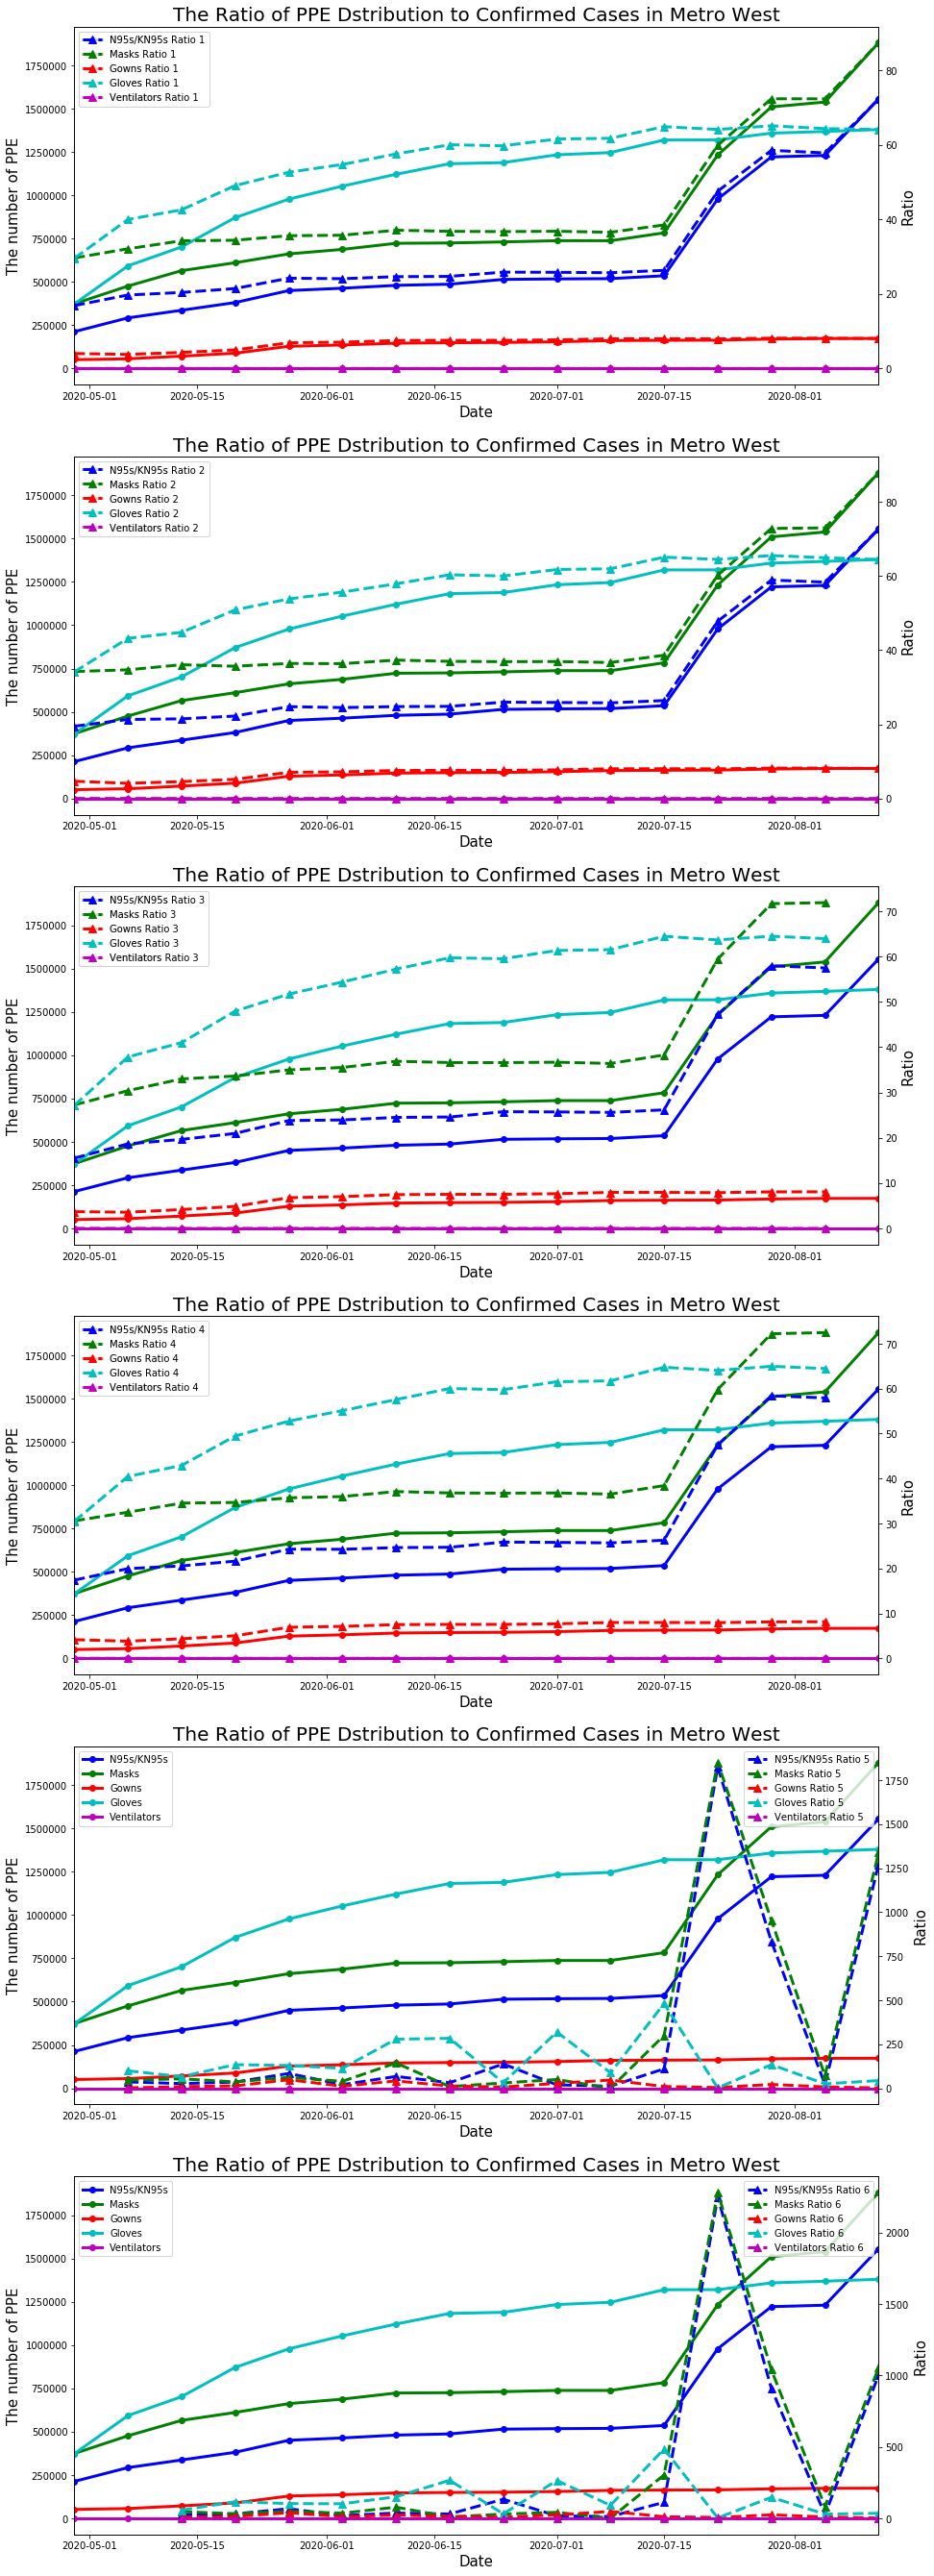

In [18]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=MW_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Metro West', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=MW_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

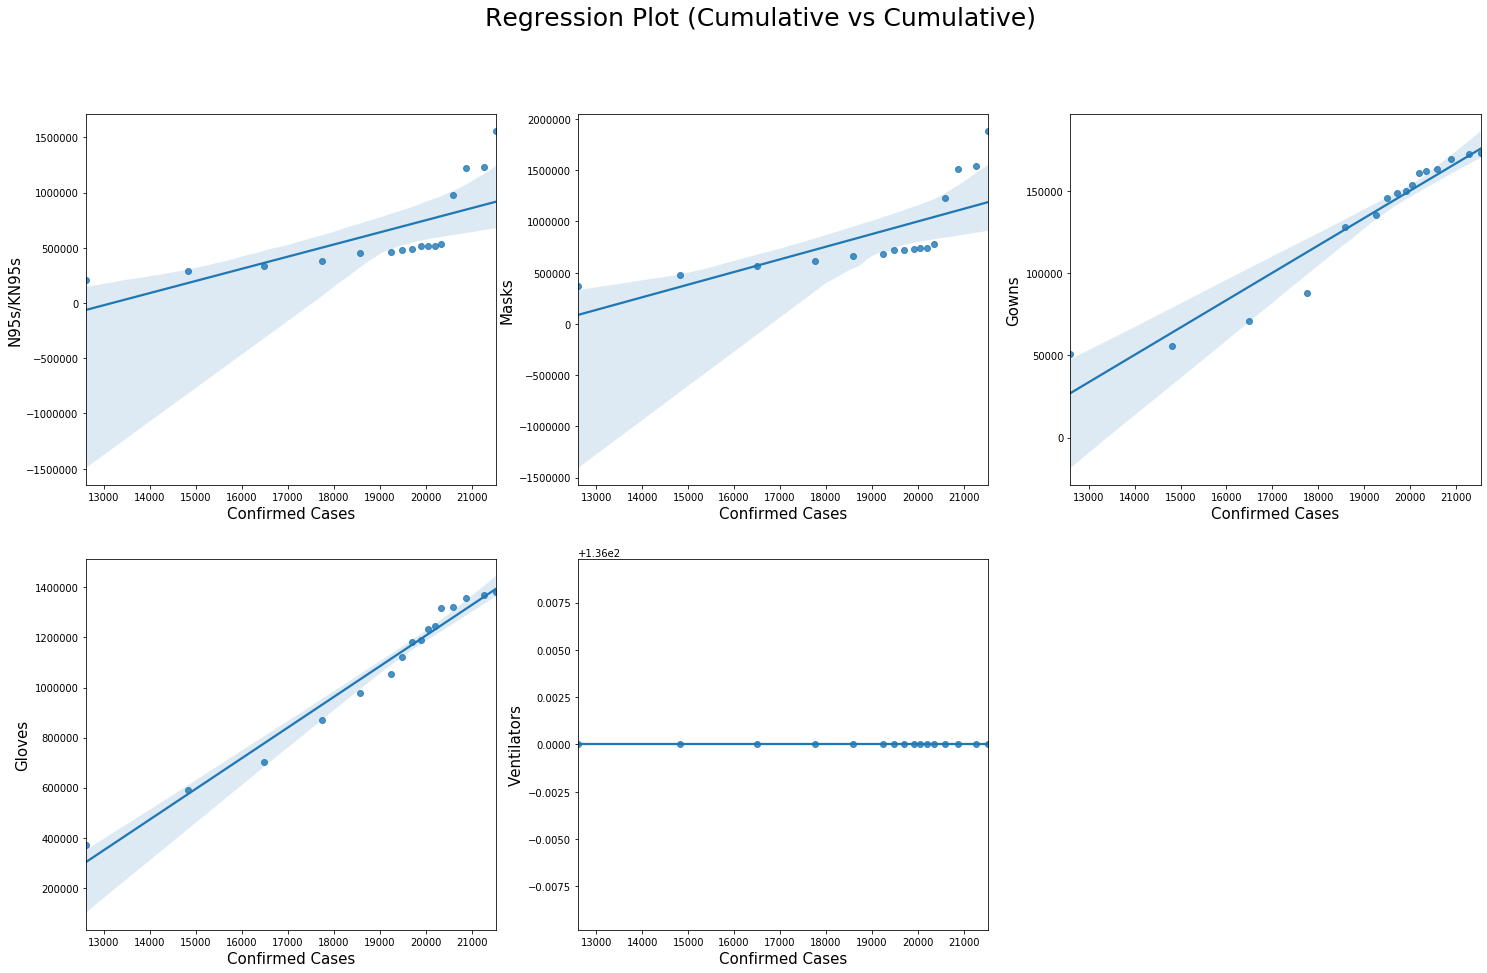

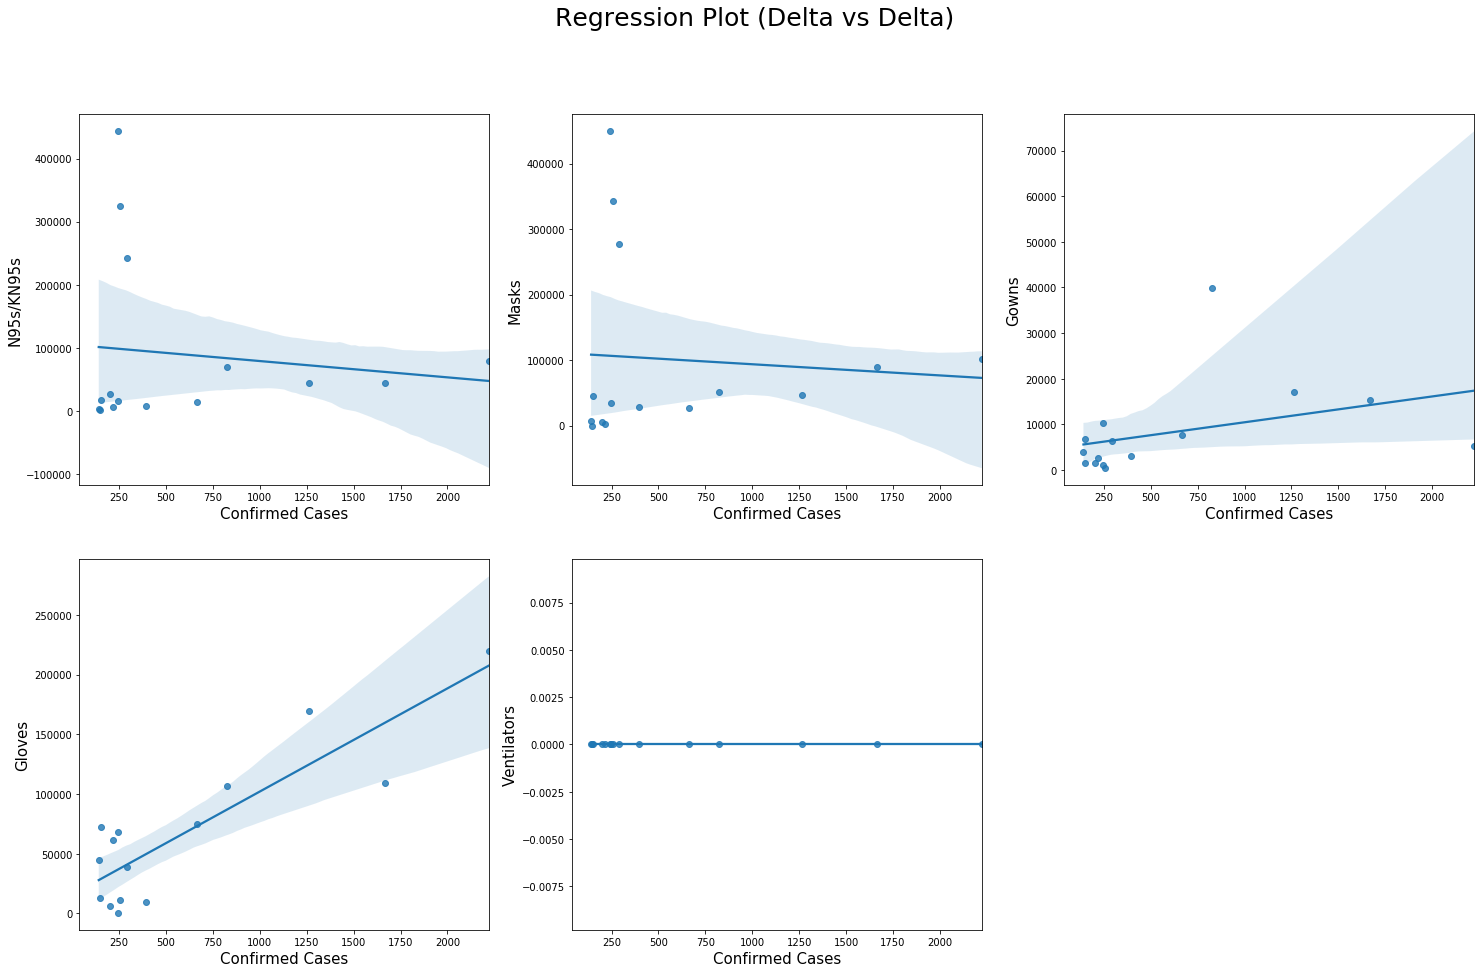

In [19]:
for category in categories:
    MW_CC['{} delta'.format(category)] = MW_CC[category].diff()
    MW_CC['Confirmed Cases delta'] = MW_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=MW_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=MW_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [20]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = MW_CC[category]
    X[categories.index(category)] = MW_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     12.77
Date:                Thu, 13 Aug 2020   Prob (F-statistic):            0.00305
Time:                        17:46:15   Log-Likelihood:                -222.96
No. Observations:                  16   AIC:                             449.9
Df Residuals:                      14   BIC:                             451.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.447e+06   5.87e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Metro Boston

Time        Region  N95s/KN95s     Masks    Gowns    Gloves  \
40 2020-04-29  Metro Boston     94235.0  130800.0  23036.0  465692.0   
47 2020-05-06  Metro Boston    115642.0  146600.0  27956.0  535892.0   
54 2020-05-13  Metro Boston    127621.0  187600.0  31366.0  575792.0   
61 2020-05-20  Metro Boston    135101.0  217400.0  37846.0  626992.0   
68 2020-05-27  Metro Boston    157158.0  234150.0  43206.0  646892.0   
69 2020-06-03  Metro Boston    159715.0  238150.0  46156.0  676892.0   
70 2020-06-10  Metro Boston    161838.0  242350.0  47216.0  673292.0   
71 2020-06-17  Metro Boston    163040.0  246350.0  48436.0  678892.0   
72 2020-06-24  Metro Boston    163736.0  251350.0  48511.0  691942.0   
73 2020-07-01  Metro Boston    165116.0  256850.0  49011.0  701342.0   
74 2020-07-08  Metro Boston    168236.0  259850.0  49511.0  716342.0   
75 2020-07-15  Metro Boston    179881.0  294100.0  51711.0  720342.0   
76 2020-07-22  Metro Boston    345331.0  467100.0  54111.0  720342.0   
77 2020-07-29  Metro Boston    370891.0  475350.0  54111.0  720342.0   
78 2020-08-05  Metro Boston    371961.0  478450.0  54111.0  722342.0   
79 2020-08-12  Metro Boston    371961.0  478450.0  54111.0  785742.0   

    Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
40        204.0          12539.0     25.334645   27.338280   42.571751   
47        204.0          14476.0     31.089819   30.640610   51.664172   
54        204.0          15587.0     34.310317   39.209949   57.966033   
61        204.0          16962.0     36.321281   45.438395   69.941417   
68        204.0          17596.0     42.251204   48.939283   79.846981   
69        204.0          18108.0     42.938641   49.775316   85.298738   
70        204.0          18398.0     43.509400   50.653151   87.257674   
71        204.0          18652.0     43.832552   51.489184   89.512299   
72        204.0          18805.0     44.019669   52.534225   89.650903   
73        204.0          18978.0     44.390675   53.683771   90.574929   
74        204.0          19186.0     45.229473   54.310795   91.498956   
75        204.0          19428.0     48.360178   61.469328   95.564673   
76        204.0          19637.0     92.840647   97.627756  100.000000   
77        204.0          19940.0     99.712335   99.352074  100.000000   
78        204.0          20448.0    100.000000  100.000000  100.000000   
79        204.0          20899.0    100.000000  100.000000  100.000000   

      Gloves %  Ventilators %  
40   59.267800          100.0  
47   68.202031          100.0  
54   73.280033          100.0  
61   79.796167          100.0  
68   82.328805          100.0  
69   86.146852          100.0  
70   85.688687          100.0  
71   86.401389          100.0  
72   88.062239          100.0  
73   89.258561          100.0  
74   91.167584          100.0  
75   91.676657          100.0  
76   91.676657          100.0  
77   91.676657          100.0  
78   91.931194          100.0  
79  100.000000          100.0

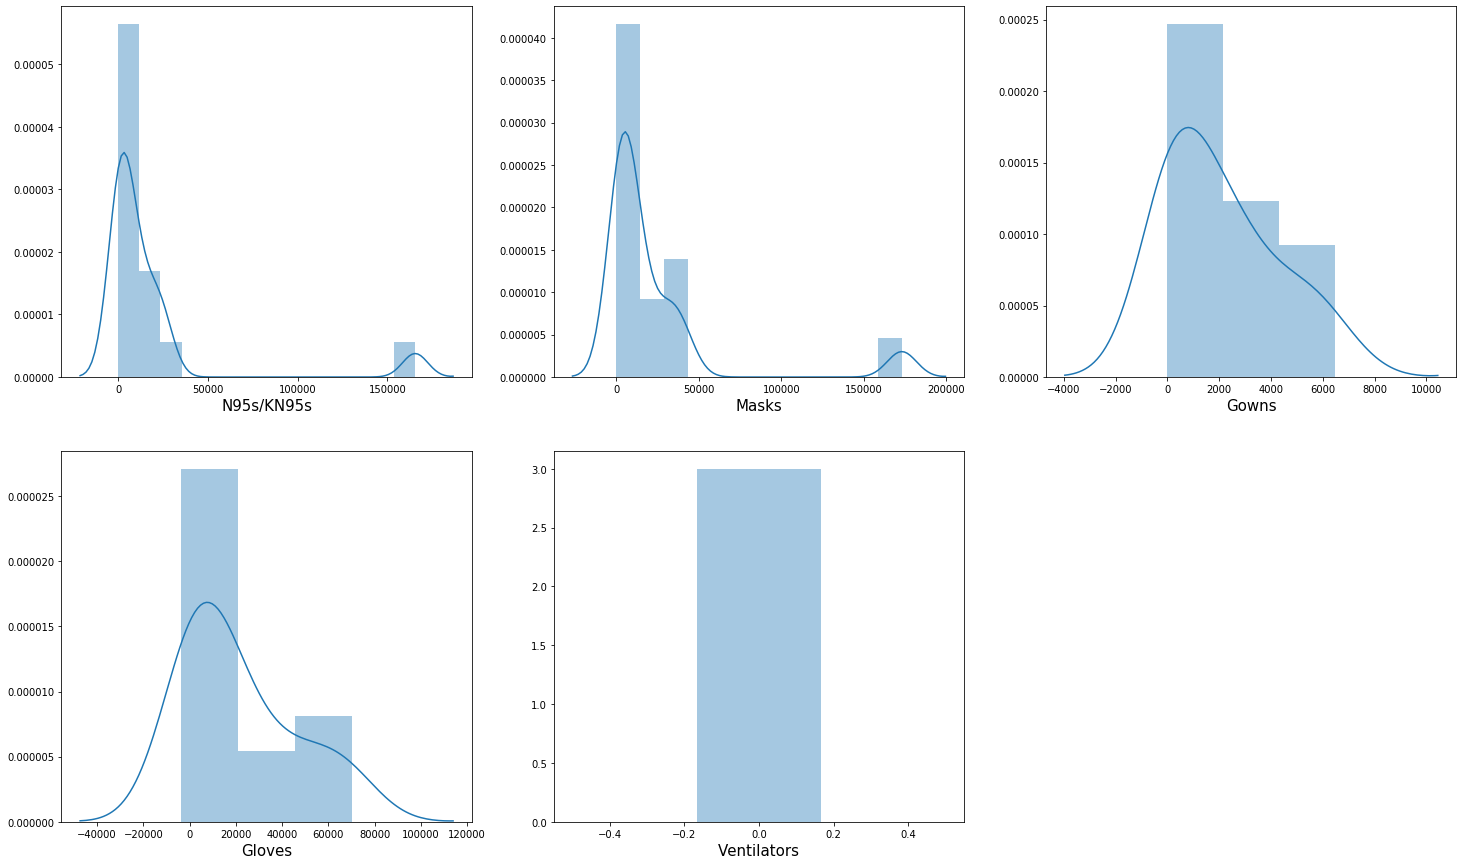

In [21]:
MB = df.loc[df['Region']=='Metro Boston']
MB_CC = MB.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    MB_CC['{} %'.format(category)] = MB_CC[category]/MB_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(MB_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
MB_CC

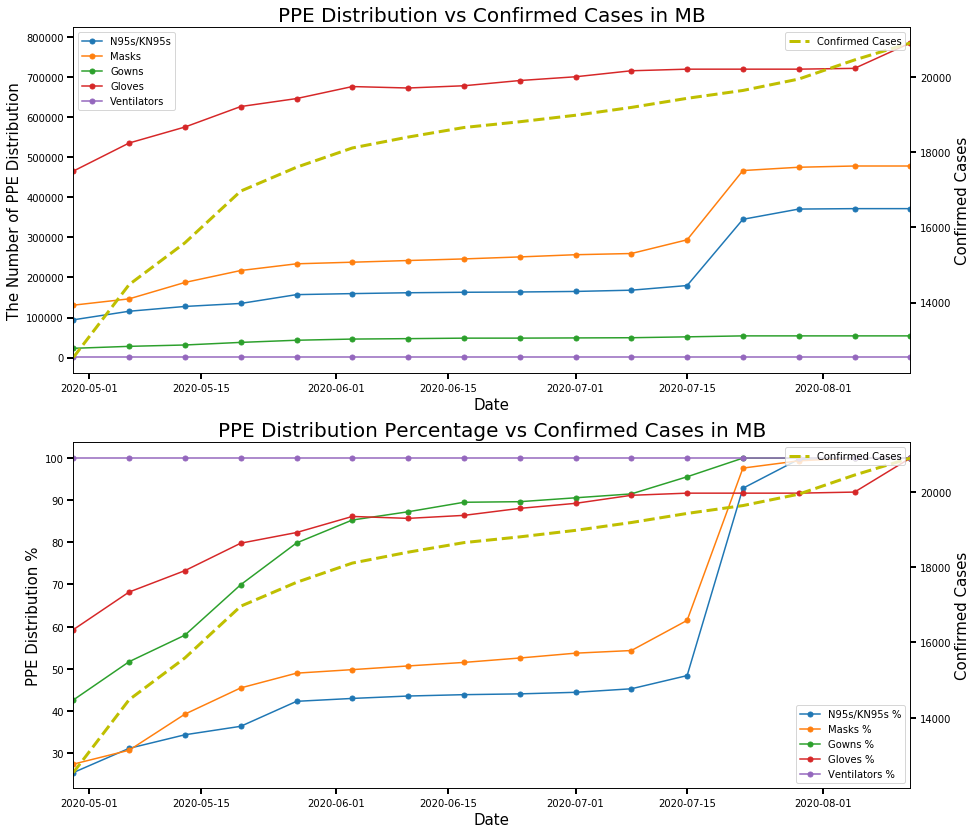

In [22]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=MB_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MB', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=MB_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=MB_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in MB', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=MB_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    MB_CC['{} Ratio 1'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
MB_CC['Confirmed Cases(ma1)'] = MB_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
MB_CC.iloc[0,-1] = (9060+12539) / 2
for category in categories:
    MB_CC['{} Ratio 2'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
MB_CC['Confirmed Cases(ma2)'] = MB_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    MB_CC['{} Ratio 3'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
MB_CC['Confirmed Cases(ma3)'] = MB_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
MB_CC.iloc[0,-1] = (9060+12539+14476)/3
for category in categories:
    MB_CC['{} Ratio 4'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    MB_CC['{} Ratio 5'.format(category)] = MB_CC[category].diff()/MB_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    MB_CC['{} Ratio 6'.format(category)] = MB_CC[category].diff()/MB_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
MB_CC

Time        Region  N95s/KN95s     Masks    Gowns    Gloves  \
40 2020-04-29  Metro Boston     94235.0  130800.0  23036.0  465692.0   
47 2020-05-06  Metro Boston    115642.0  146600.0  27956.0  535892.0   
54 2020-05-13  Metro Boston    127621.0  187600.0  31366.0  575792.0   
61 2020-05-20  Metro Boston    135101.0  217400.0  37846.0  626992.0   
68 2020-05-27  Metro Boston    157158.0  234150.0  43206.0  646892.0   
69 2020-06-03  Metro Boston    159715.0  238150.0  46156.0  676892.0   
70 2020-06-10  Metro Boston    161838.0  242350.0  47216.0  673292.0   
71 2020-06-17  Metro Boston    163040.0  246350.0  48436.0  678892.0   
72 2020-06-24  Metro Boston    163736.0  251350.0  48511.0  691942.0   
73 2020-07-01  Metro Boston    165116.0  256850.0  49011.0  701342.0   
74 2020-07-08  Metro Boston    168236.0  259850.0  49511.0  716342.0   
75 2020-07-15  Metro Boston    179881.0  294100.0  51711.0  720342.0   
76 2020-07-22  Metro Boston    345331.0  467100.0  54111.0  720342.0   
77 2020-07-29  Metro Boston    370891.0  475350.0  54111.0  720342.0   
78 2020-08-05  Metro Boston    371961.0  478450.0  54111.0  722342.0   
79 2020-08-12  Metro Boston    371961.0  478450.0  54111.0  785742.0   

    Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
40        204.0          12539.0     25.334645   27.338280   42.571751   
47        204.0          14476.0     31.089819   30.640610   51.664172   
54        204.0          15587.0     34.310317   39.209949   57.966033   
61        204.0          16962.0     36.321281   45.438395   69.941417   
68        204.0          17596.0     42.251204   48.939283   79.846981   
69        204.0          18108.0     42.938641   49.775316   85.298738   
70        204.0          18398.0     43.509400   50.653151   87.257674   
71        204.0          18652.0     43.832552   51.489184   89.512299   
72        204.0          18805.0     44.019669   52.534225   89.650903   
73        204.0          18978.0     44.390675   53.683771   90.574929   
74        204.0          19186.0     45.229473   54.310795   91.498956   
75        204.0          19428.0     48.360178   61.469328   95.564673   
76        204.0          19637.0     92.840647   97.627756  100.000000   
77        204.0          19940.0     99.712335   99.352074  100.000000   
78        204.0          20448.0    100.000000  100.000000  100.000000   
79        204.0          20899.0    100.000000  100.000000  100.000000   

      Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
40   59.267800          100.0            7.515352      10.431454   
47   68.202031          100.0            7.988533      10.127107   
54   73.280033          100.0            8.187656      12.035671   
61   79.796167          100.0            7.964922      12.816885   
68   82.328805          100.0            8.931462      13.307002   
69   86.146852          100.0            8.820135      13.151646   
70   85.688687          100.0            8.796500      13.172627   
71   86.401389          100.0            8.741154      13.207699   
72   88.062239          100.0            8.707046      13.366126   
73   89.258561          100.0            8.700390      13.534092   
74   91.167584          100.0            8.768685      13.543730   
75   91.676657          100.0            9.258853      15.137945   
76   91.676657          100.0           17.585731      23.786729   
77   91.676657          100.0           18.600351      23.839017   
78   91.931194          100.0           18.190581      23.398376   
79  100.000000          100.0           17.798029      22.893440   

    Gowns Ratio 1  Gloves Ratio 1  Ventilators Ratio 1  Confirmed Cases(ma1)  \
40       1.837148       37.139485             0.016269               10799.5   
47       1.931196       37.019342             0.014092               13507.5   
54       2.012318       36.940527             0.013088               15031.5   
61       2.231223       36.964509             0.

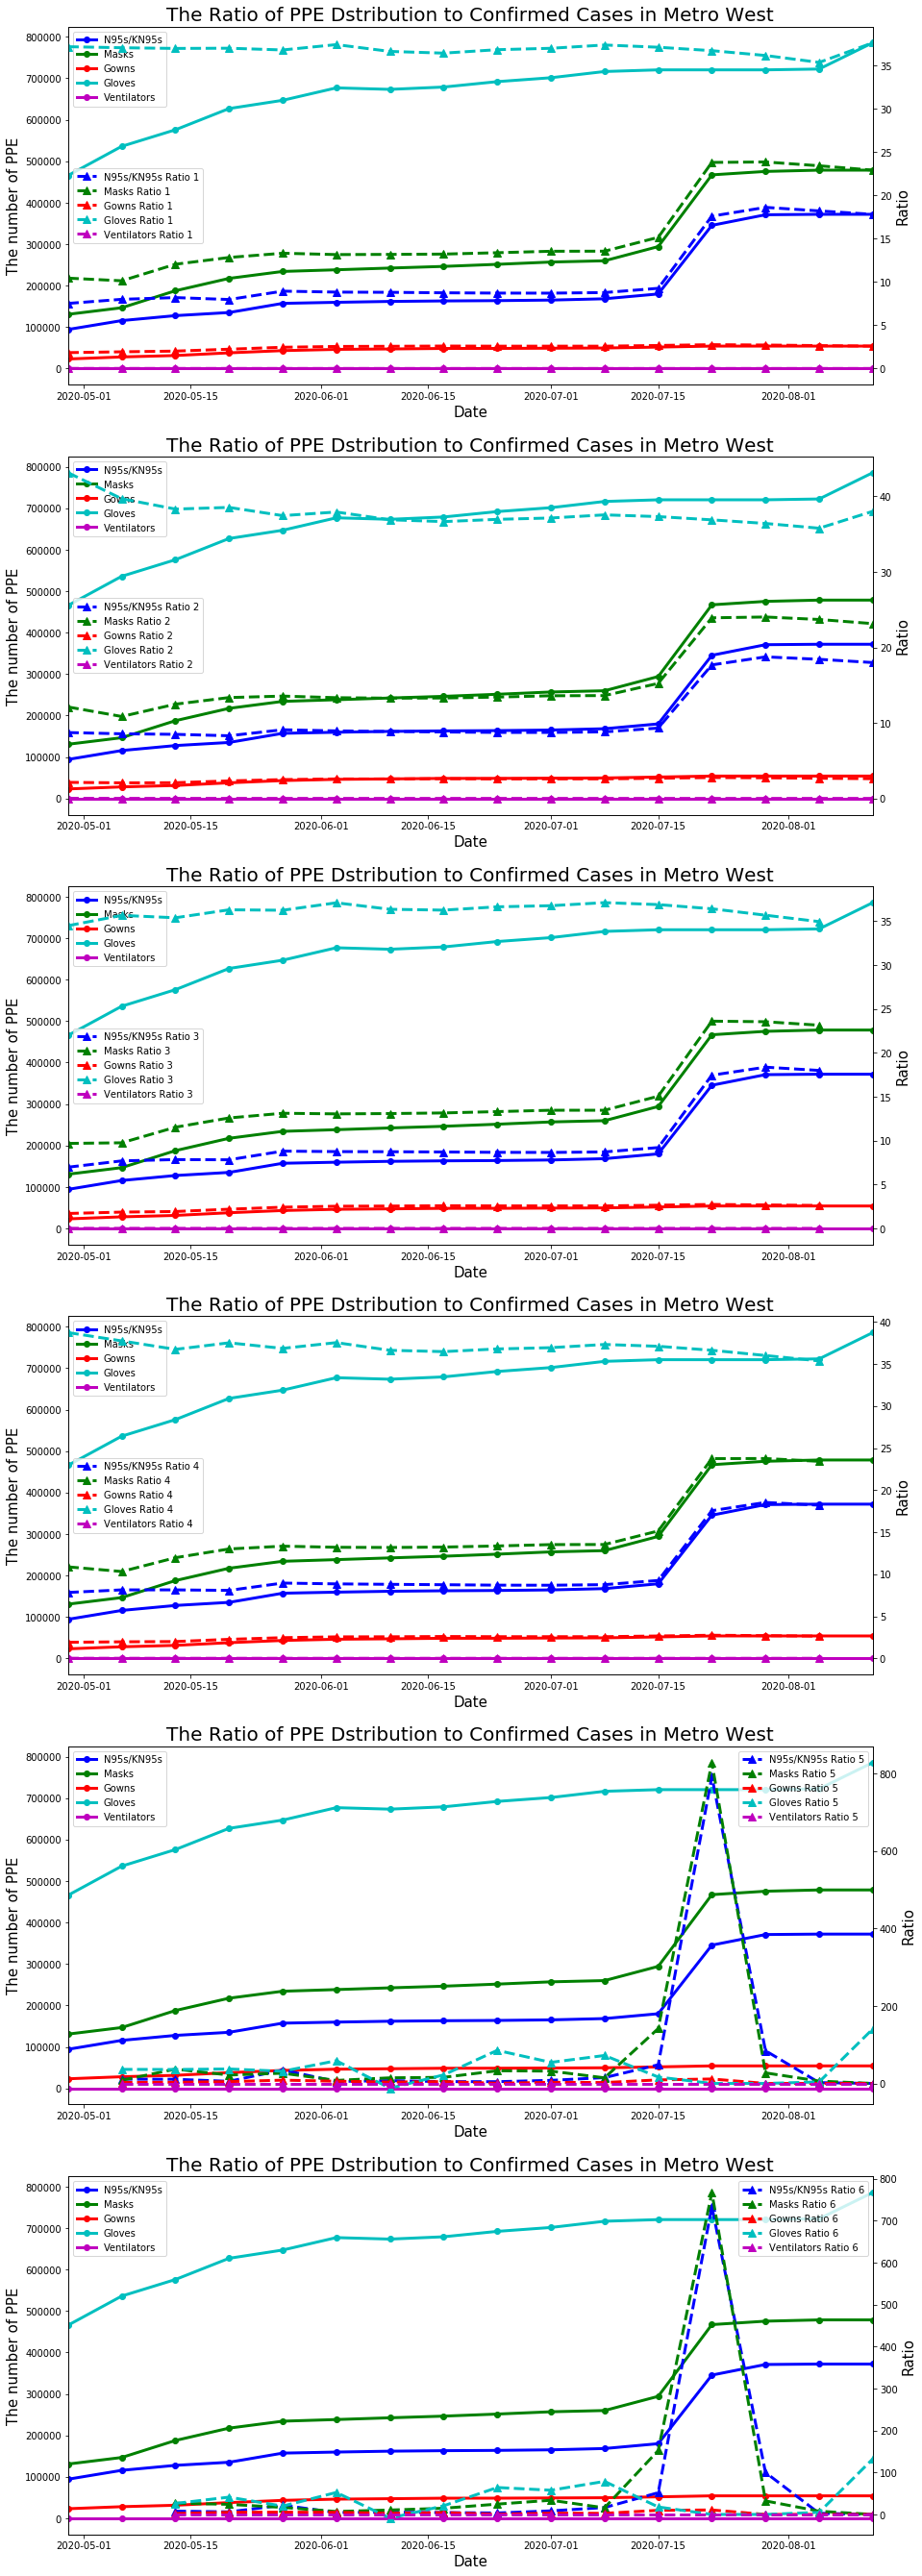

In [24]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=MB_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Metro West', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=MB_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

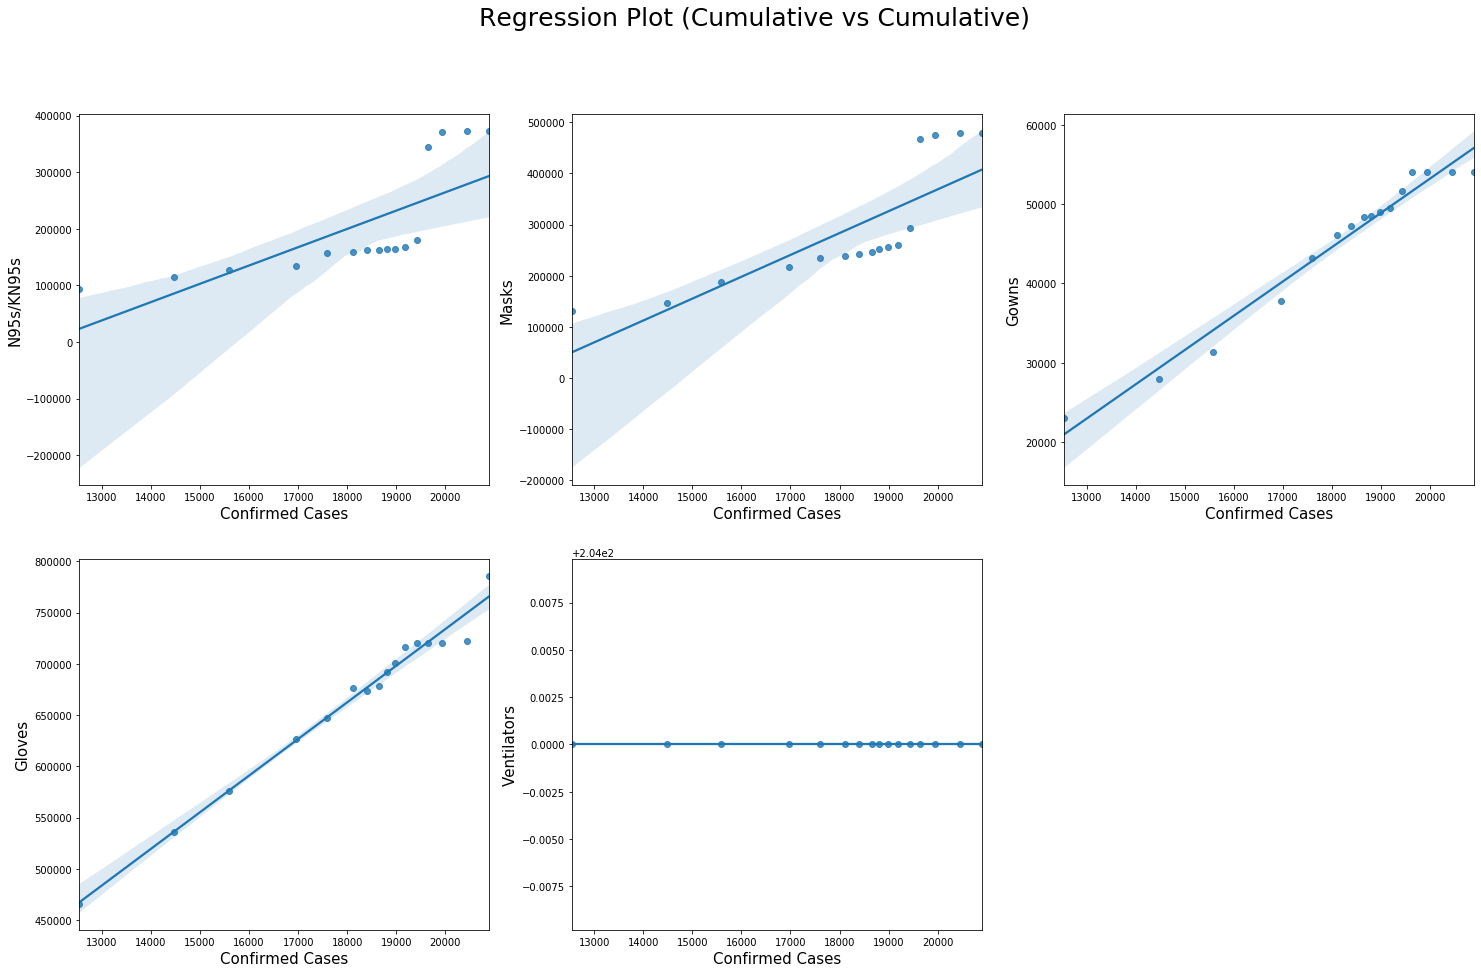

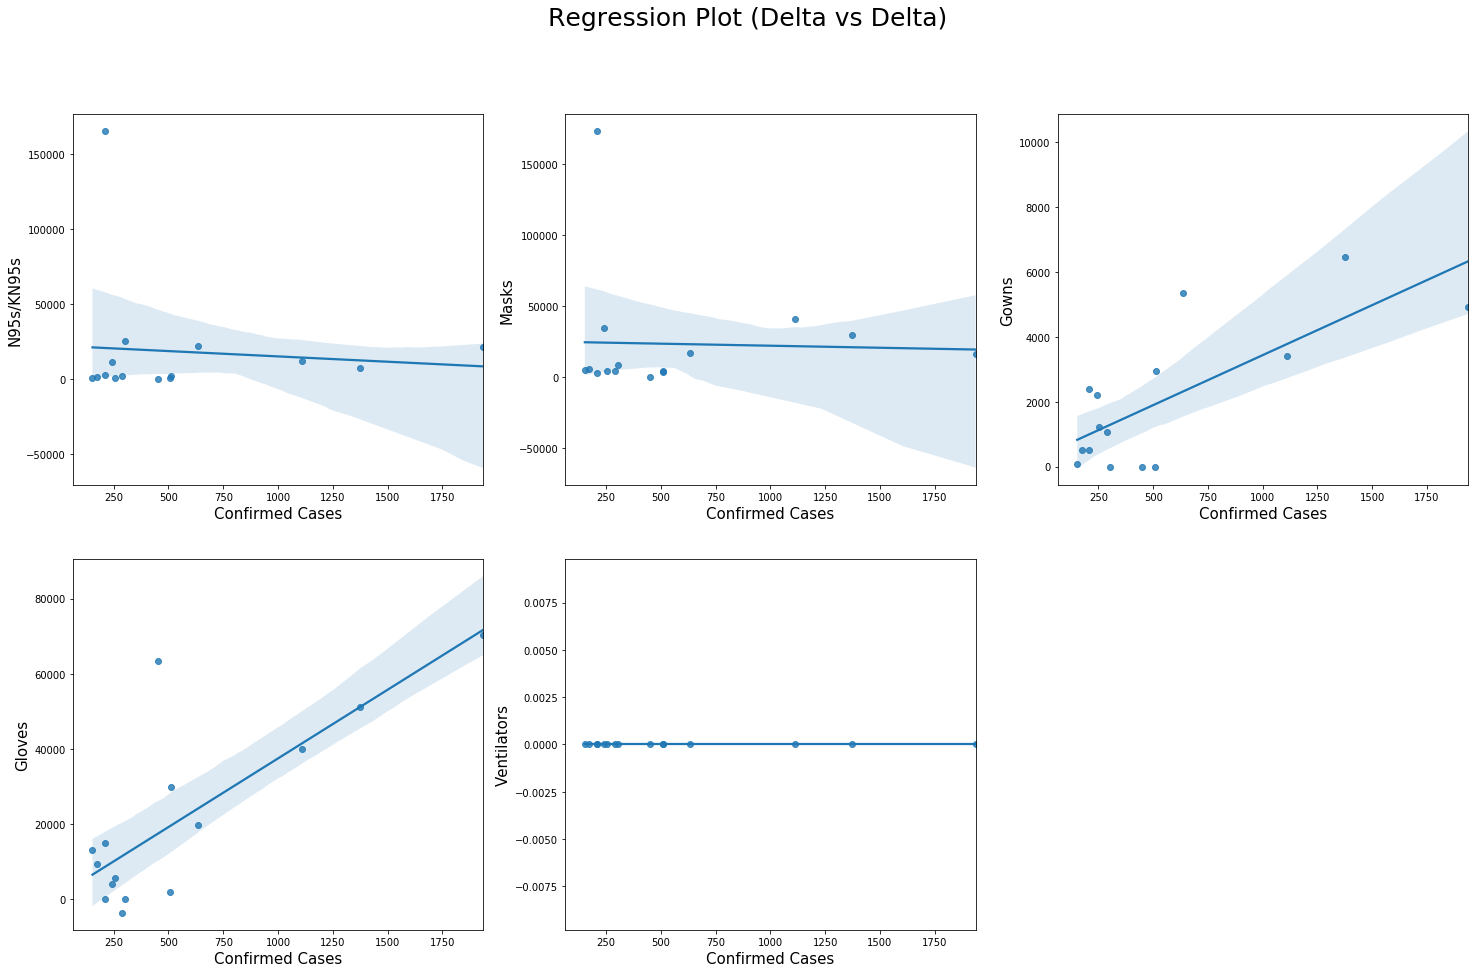

In [25]:
for category in categories:
    MB_CC['{} delta'.format(category)] = MB_CC[category].diff()
    MB_CC['Confirmed Cases delta'] = MB_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=MB_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=MB_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [26]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = MB_CC[category]
    X[categories.index(category)] = MB_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     16.21
Date:                Thu, 13 Aug 2020   Prob (F-statistic):            0.00125
Time:                        17:46:22   Log-Likelihood:                -200.10
No. Observations:                  16   AIC:                             404.2
Df Residuals:                      14   BIC:                             405.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.819e+05   1.46e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Central Massachusetts

In [27]:
CM = df.loc[df['Region']=='Central Massachusetts']
CM_CC = CM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    CM_CC['{} %'.format(category)] = CM_CC[category]/CM_CC[category].iloc[-1] * 100
    
# fig, axes = plt.subplots(2, 3, figsize=(25,15))
# for ax, category in zip(axes.flatten(), categories):
#     sns.distplot(CM_CC[category].diff(), ax=ax)
#     ax.set_xlabel(category, fontsize=15)
# fig.delaxes(axes[1,2])
CM_CC

Time                 Region  N95s/KN95s      Masks    Gowns  \
0  2020-04-29  Central Massachusetts    138350.0   263767.0  43293.0   
7  2020-05-06  Central Massachusetts    170144.0   292767.0  46627.0   
14 2020-05-13  Central Massachusetts    184220.0   350367.0  54390.0   
21 2020-05-20  Central Massachusetts    191280.0   364617.0  60380.0   
28 2020-05-27  Central Massachusetts    220534.0   392367.0  69922.0   
29 2020-06-03  Central Massachusetts    239254.0   420667.0  75489.0   
30 2020-06-10  Central Massachusetts    246659.0   456767.0  79129.0   
31 2020-06-17  Central Massachusetts    245449.0   462867.0  83339.0   
32 2020-06-24  Central Massachusetts    246509.0   465367.0  84339.0   
33 2020-07-01  Central Massachusetts    248049.0   472067.0  88739.0   
34 2020-07-08  Central Massachusetts    249229.0   474167.0  90249.0   
35 2020-07-15  Central Massachusetts    254659.0   493317.0  93149.0   
36 2020-07-22  Central Massachusetts    425969.0   687317.0  93149.0   
37 2020-07-29  Central Massachusetts    546539.0   814117.0  93179.0   
38 2020-08-05  Central Massachusetts    549419.0   820117.0  95779.0   
39 2020-08-12  Central Massachusetts    864179.0  1141467.0  95779.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
0    454250.0         79.0           5363.0     16.009415   23.107720   
7    794650.0         79.0           7056.0     19.688514   25.648310   
14   858250.0         79.0           8335.0     21.317343   30.694448   
21   889350.0         79.0           9857.0     22.134303   31.942842   
28   905950.0         83.0          10743.0     25.519481   34.373924   
29   975650.0         83.0          11296.0     27.685699   36.853190   
30   986150.0         83.0          11641.0     28.542582   40.015787   
31  1003150.0         83.0          11827.0     28.402565   40.550187   
32  1007650.0         83.0          12001.0     28.525225   40.769203   
33  1013850.0         83.0          12148.0     28.703428   41.356167   
34  1015450.0         83.0          12296.0     28.839974   41.540141   
35  1026050.0         83.0          12409.0     29.468316   43.217807   
36  1027050.0         83.0          12541.0     49.291756   60.213480   
37  1027650.0         83.0          12726.0     63.243726   71.321992   
38  1037650.0         83.0          12968.0     63.576990   71.847631   
39  1067250.0         83.0          13138.0    100.000000  100.000000   

       Gowns %    Gloves %  Ventilators %  
0    45.200931   42.562661      95.180723  
7    48.681861   74.457718      95.180723  
14   56.786978   80.416959      95.180723  
21   63.040959   83.330991      95.180723  
28   73.003477   84.886390     100.000000  
29   78.815816   91.417194     100.000000  
30   82.616231   92.401031     100.000000  
31   87.011767   93.993910     100.000000  
32   88.055837   94.415554     100.000000  
33   92.649746   94.996486     100.000000  
34   94.226292   95.146404     100.000000  
35   97.254095   96.139611     100.000000  
36   97.254095   96.233310     100.000000  
37   97.285417   96.289529     100.000000  
38  100.000000   97.226517     100.000000  
39  100.000000  100.000000     100.000000

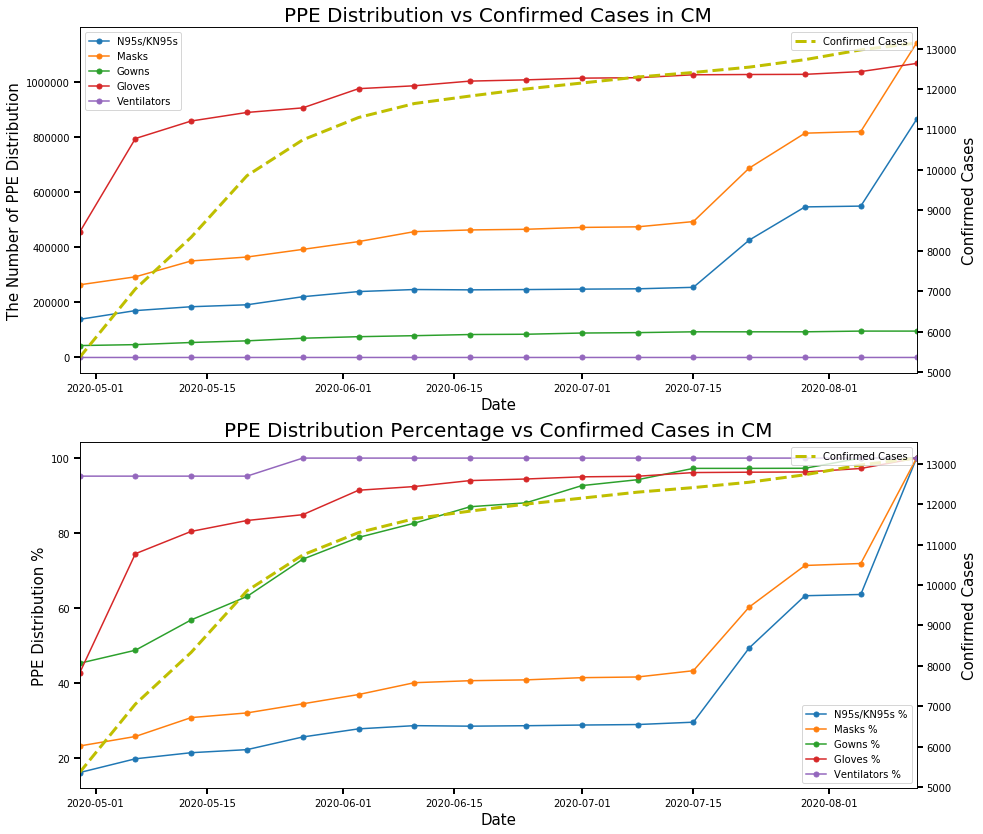

In [28]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=CM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in CM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=CM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=CM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in CM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=CM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [29]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    CM_CC['{} Ratio 1'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
CM_CC['Confirmed Cases(ma1)'] = CM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
CM_CC.iloc[0,-1] = (3474+5363) / 2
for category in categories:
    CM_CC['{} Ratio 2'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
CM_CC['Confirmed Cases(ma2)'] = CM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    CM_CC['{} Ratio 3'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
CM_CC['Confirmed Cases(ma3)'] = CM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
CM_CC.iloc[0,-1] = (3474+5363+7056)/3
for category in categories:
    CM_CC['{} Ratio 4'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    CM_CC['{} Ratio 5'.format(category)] = CM_CC[category].diff()/CM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    CM_CC['{} Ratio 6'.format(category)] = CM_CC[category].diff()/CM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
CM_CC

Time                 Region  N95s/KN95s      Masks    Gowns  \
0  2020-04-29  Central Massachusetts    138350.0   263767.0  43293.0   
7  2020-05-06  Central Massachusetts    170144.0   292767.0  46627.0   
14 2020-05-13  Central Massachusetts    184220.0   350367.0  54390.0   
21 2020-05-20  Central Massachusetts    191280.0   364617.0  60380.0   
28 2020-05-27  Central Massachusetts    220534.0   392367.0  69922.0   
29 2020-06-03  Central Massachusetts    239254.0   420667.0  75489.0   
30 2020-06-10  Central Massachusetts    246659.0   456767.0  79129.0   
31 2020-06-17  Central Massachusetts    245449.0   462867.0  83339.0   
32 2020-06-24  Central Massachusetts    246509.0   465367.0  84339.0   
33 2020-07-01  Central Massachusetts    248049.0   472067.0  88739.0   
34 2020-07-08  Central Massachusetts    249229.0   474167.0  90249.0   
35 2020-07-15  Central Massachusetts    254659.0   493317.0  93149.0   
36 2020-07-22  Central Massachusetts    425969.0   687317.0  93149.0   
37 2020-07-29  Central Massachusetts    546539.0   814117.0  93179.0   
38 2020-08-05  Central Massachusetts    549419.0   820117.0  95779.0   
39 2020-08-12  Central Massachusetts    864179.0  1141467.0  95779.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
0    454250.0         79.0           5363.0     16.009415   23.107720   
7    794650.0         79.0           7056.0     19.688514   25.648310   
14   858250.0         79.0           8335.0     21.317343   30.694448   
21   889350.0         79.0           9857.0     22.134303   31.942842   
28   905950.0         83.0          10743.0     25.519481   34.373924   
29   975650.0         83.0          11296.0     27.685699   36.853190   
30   986150.0         83.0          11641.0     28.542582   40.015787   
31  1003150.0         83.0          11827.0     28.402565   40.550187   
32  1007650.0         83.0          12001.0     28.525225   40.769203   
33  1013850.0         83.0          12148.0     28.703428   41.356167   
34  1015450.0         83.0          12296.0     28.839974   41.540141   
35  1026050.0         83.0          12409.0     29.468316   43.217807   
36  1027050.0         83.0          12541.0     49.291756   60.213480   
37  1027650.0         83.0          12726.0     63.243726   71.321992   
38  1037650.0         83.0          12968.0     63.576990   71.847631   
39  1067250.0         83.0          13138.0    100.000000  100.000000   

       Gowns %    Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
0    45.200931   42.562661      95.180723           25.797128      49.182734   
7    48.681861   74.457718      95.180723           24.113379      41.491922   
14   56.786978   80.416959      95.180723           22.101980      42.035633   
21   63.040959   83.330991      95.180723           19.405499      36.990667   
28   73.003477   84.886390     100.000000           20.528158      36.523038   
29   78.815816   91.417194     100.000000           21.180418      37.240351   
30   82.616231   92.401031     100.000000           21.188815      39.237780   
31   87.011767   93.993910     100.000000           20.753276      39.136467   
32   88.055837   94.415554     100.000000           20.540705      38.777352   
33   92.649746   94.996486     100.000000           20.418917      38.859648   
34   94.226292   95.146404     100.000000           20.269112      38.562703   
35   97.254095   96.139611     100.000000           20.522121      39.754775   
36   97.254095   96.233310     100.000000           33.966111      54.805598   
37   97.285417   96.289529     100.000000           42.946645      63.972733   
38  100.000000   97.226517     100.000000           42.367289      63.241595   
39  100.000000  100.000000     100.000000           65.777059      86.882859   

    Gowns Ratio 1  Gloves Ratio 1  Ventilators Ratio 1  Confirmed Cases(ma1)  \
0        8.072534       84.700727             0.014731                4418.5   
7        6.608135    

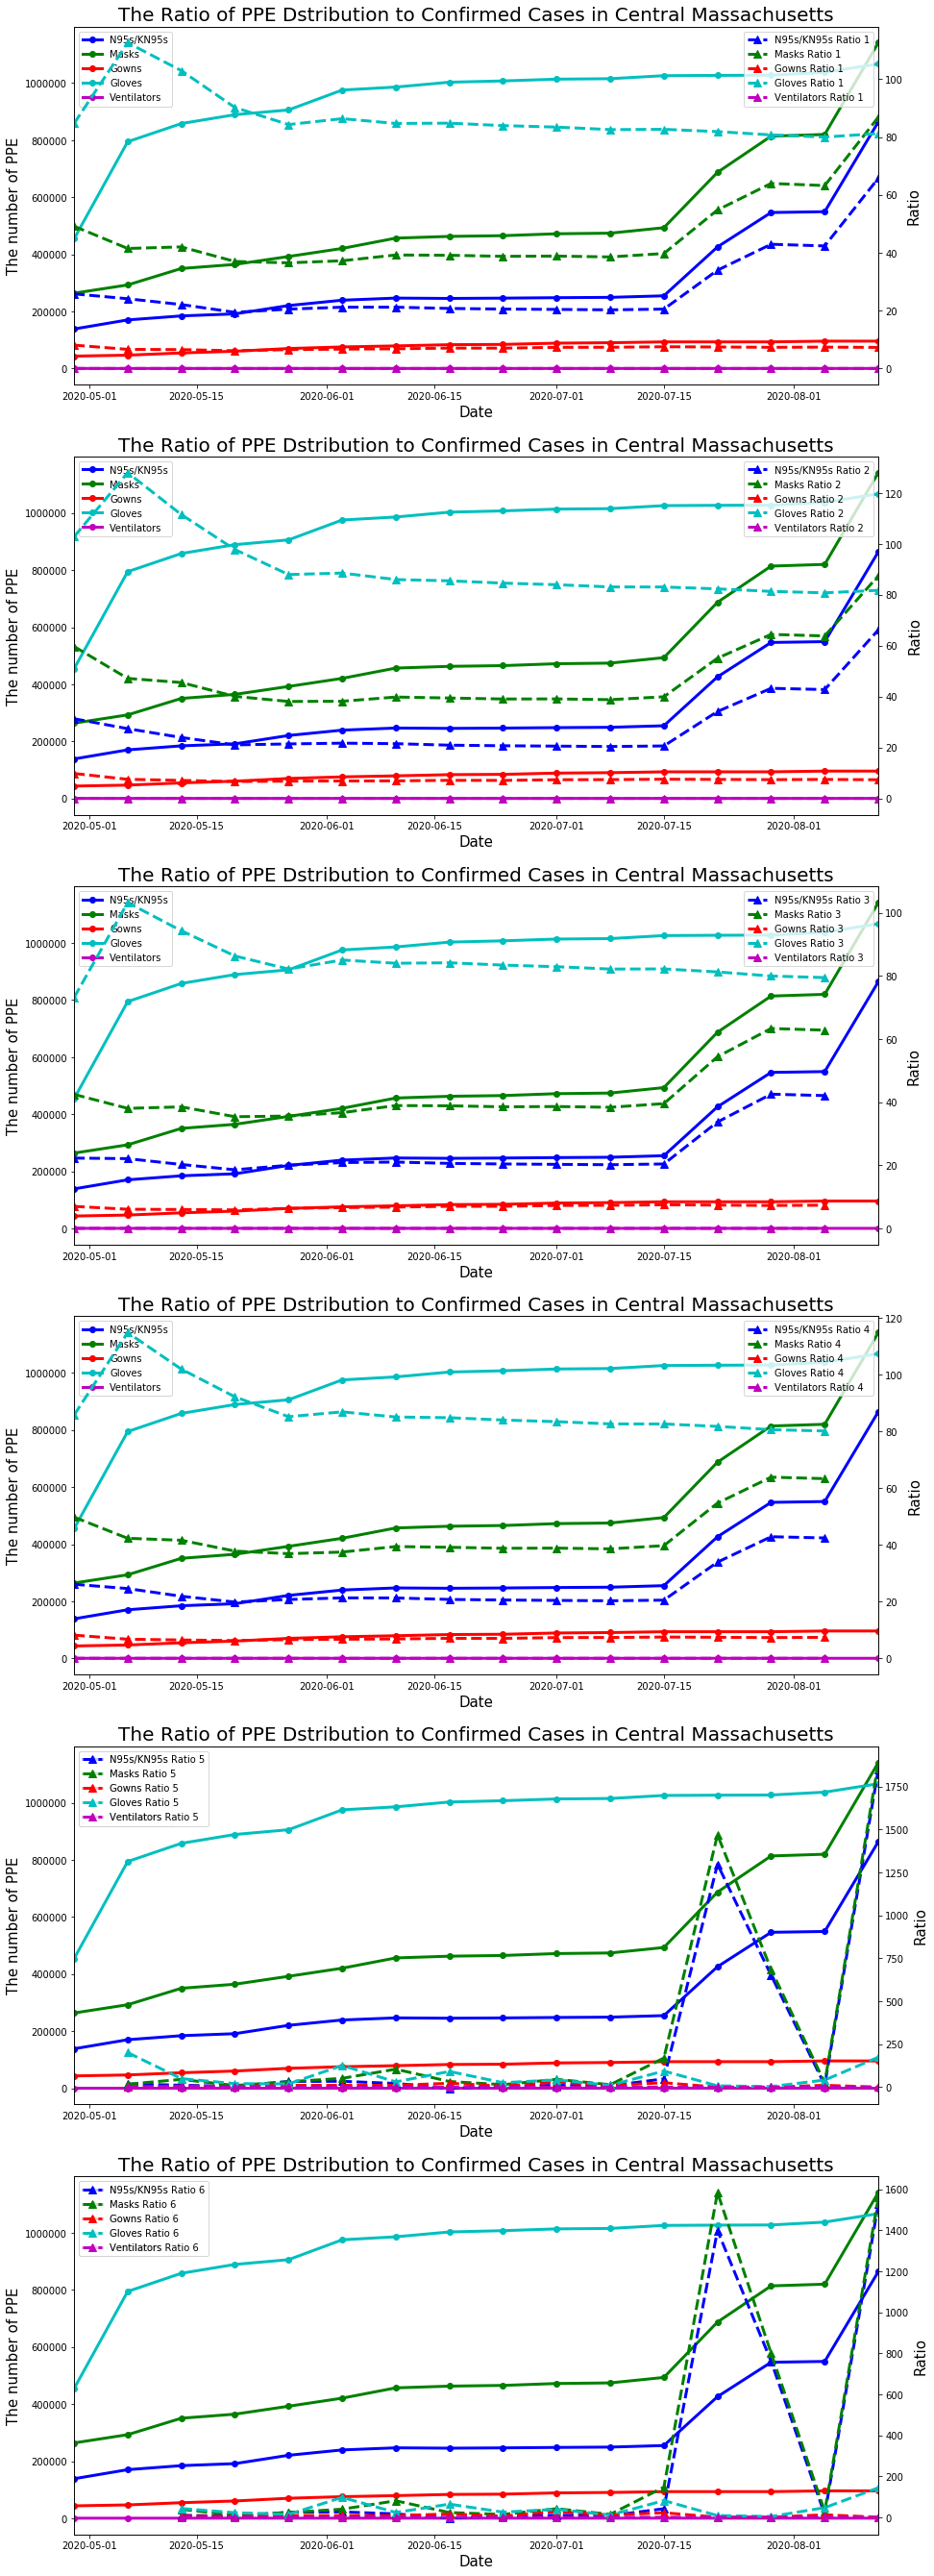

In [30]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=CM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Central Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=CM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

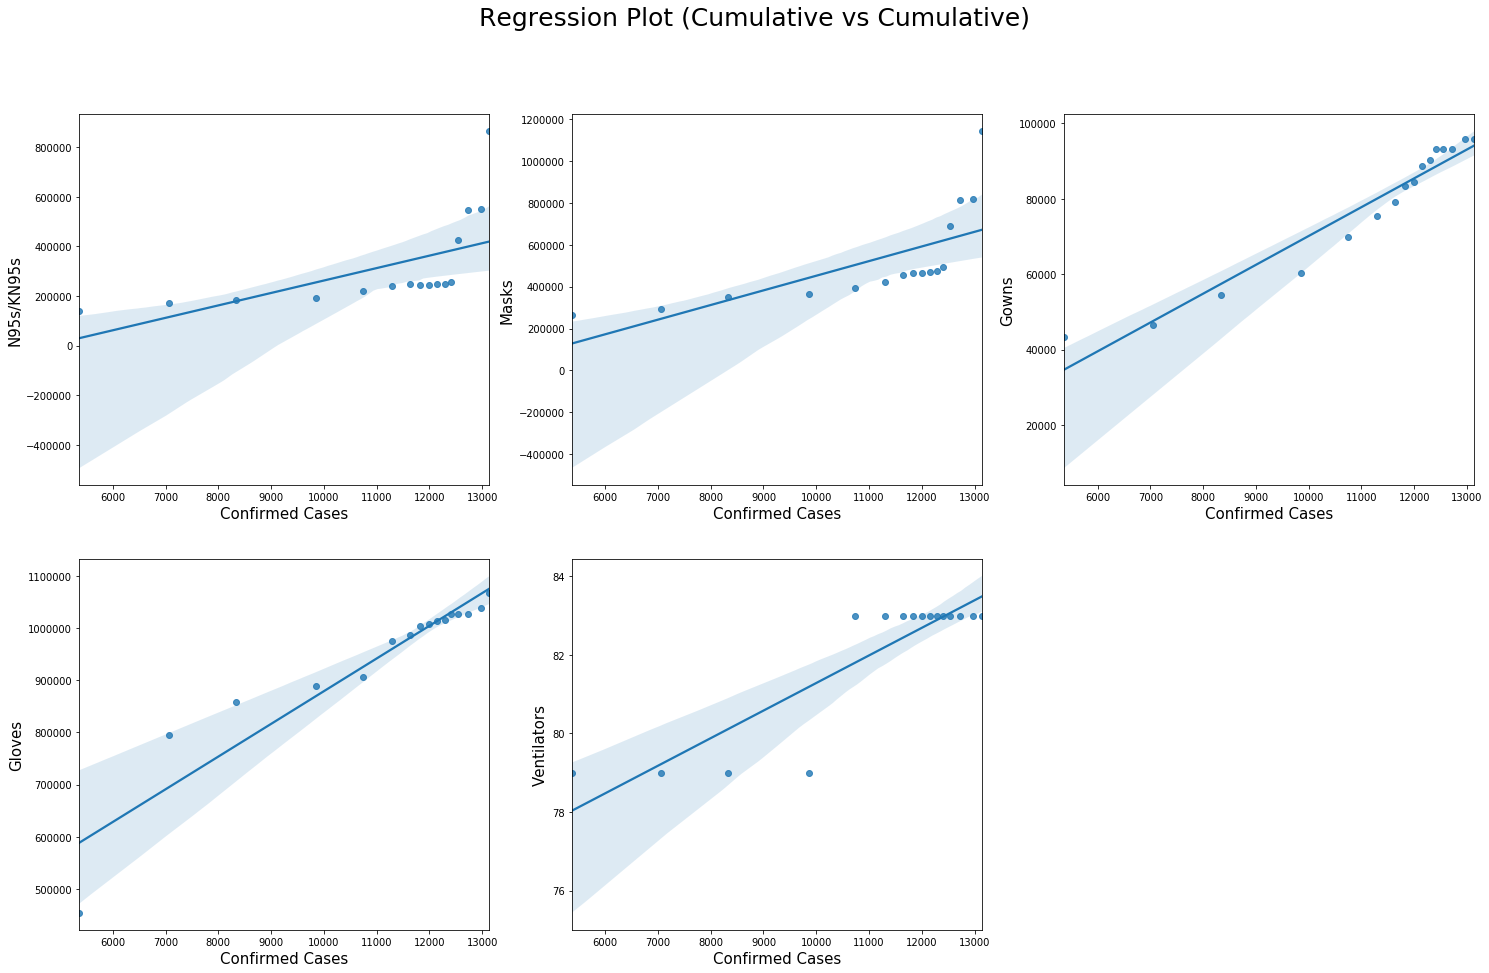

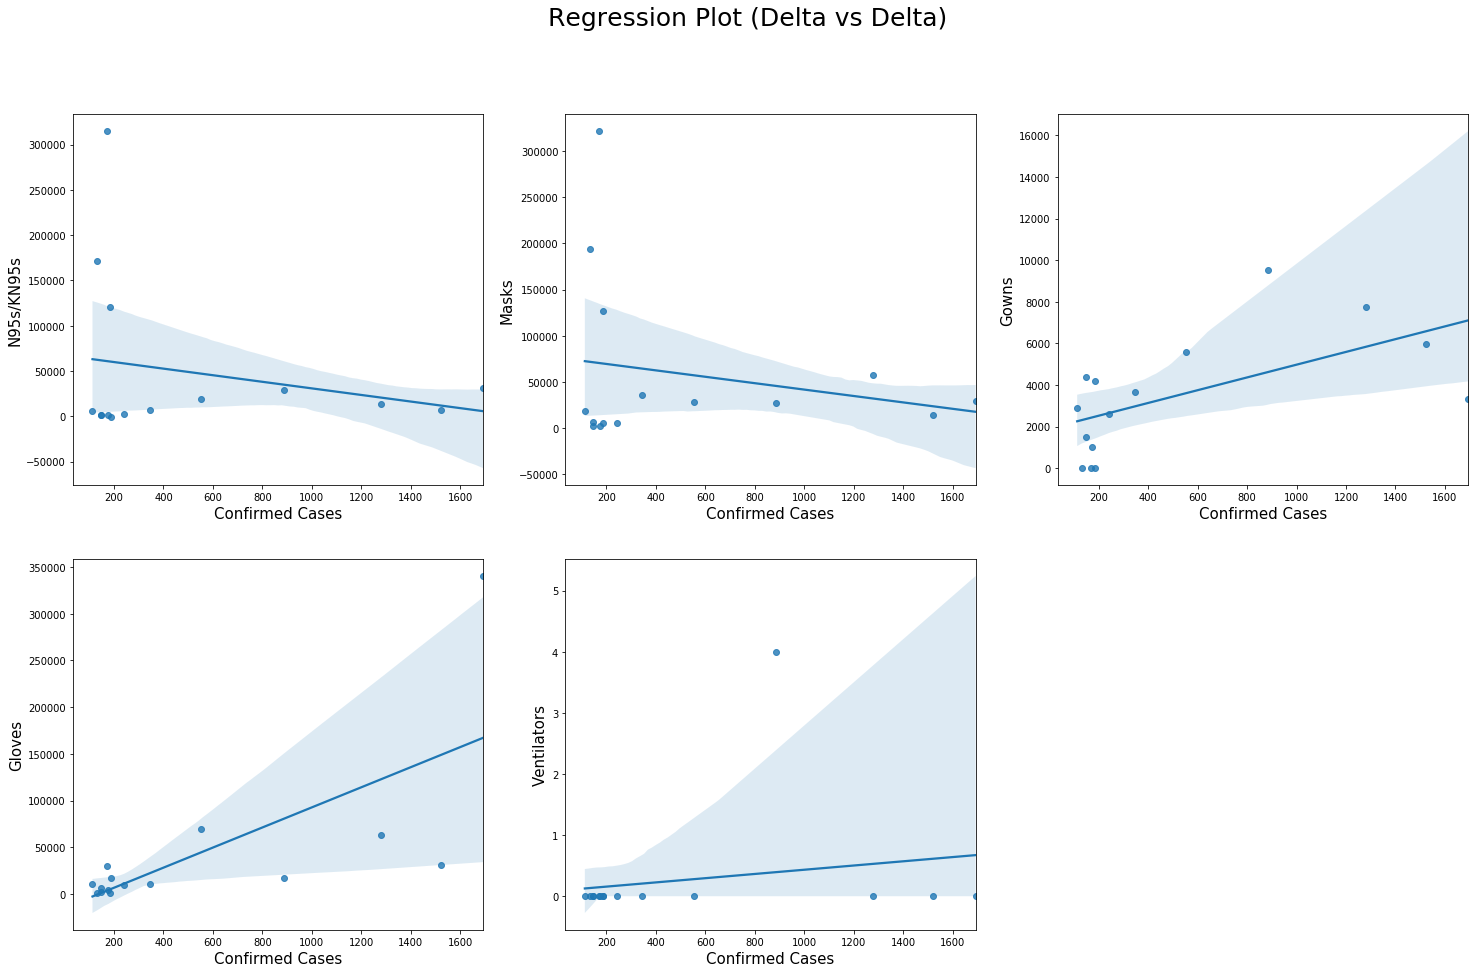

In [31]:
for category in categories:
    CM_CC['{} delta'.format(category)] = CM_CC[category].diff()
    CM_CC['Confirmed Cases delta'] = CM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=CM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=CM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [32]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = CM_CC[category]
    X[categories.index(category)] = CM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     7.600
Date:                Thu, 13 Aug 2020   Prob (F-statistic):             0.0154
Time:                        17:46:28   Log-Likelihood:                -213.29
No. Observations:                  16   AIC:                             430.6
Df Residuals:                      14   BIC:                             432.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.388e+05   2.04e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Western Massachusetts

Time                 Region  N95s/KN95s      Masks    Gowns  \
200 2020-04-29  Western Massachusetts    156323.0   300642.0  50128.0   
207 2020-05-06  Western Massachusetts    196135.0   356892.0  52813.0   
214 2020-05-13  Western Massachusetts    217121.0   402897.0  58829.0   
221 2020-05-20  Western Massachusetts    223347.0   435347.0  69279.0   
228 2020-05-27  Western Massachusetts    259107.0   467597.0  73949.0   
229 2020-06-03  Western Massachusetts    269912.0   483597.0  74919.0   
230 2020-06-10  Western Massachusetts    274382.0   493747.0  77299.0   
231 2020-06-17  Western Massachusetts    274972.0   496797.0  76569.0   
232 2020-06-24  Western Massachusetts    275262.0   508247.0  83649.0   
233 2020-07-01  Western Massachusetts    276162.0   512647.0  85099.0   
234 2020-07-08  Western Massachusetts    276922.0   515447.0  87499.0   
235 2020-07-15  Western Massachusetts    294047.0   566447.0  88599.0   
236 2020-07-22  Western Massachusetts    626547.0   908947.0  90399.0   
237 2020-07-29  Western Massachusetts   1076842.0  1377397.0  91849.0   
238 2020-08-05  Western Massachusetts   1298047.0  1627297.0  93699.0   
239 2020-08-12  Western Massachusetts   1298292.0  1630897.0  93699.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
200  324630.0         60.0           5052.0     12.040666   18.434150   
207  366030.0         60.0           5773.0     15.107156   21.883172   
214  399030.0         60.0           6526.0     16.723588   24.704013   
221  433930.0         60.0           7164.0     17.203141   26.693715   
228  467930.0         60.0           7693.0     19.957529   28.671155   
229  484930.0         60.0           7982.0     20.789776   29.652210   
230  504643.0         60.0           8157.0     21.134075   30.274567   
231  499630.0         60.0           8281.0     21.179519   30.461580   
232  536043.0         60.0           8394.0     21.201856   31.163648   
233  540443.0         60.0           8549.0     21.271178   31.433438   
234  547443.0         60.0           8689.0     21.329716   31.605123   
235  548443.0         60.0           8844.0     22.648757   34.732236   
236  550943.0         60.0           9002.0     48.259328   55.732949   
237  557183.0         60.0           9207.0     82.942974   84.456407   
238  574481.0         60.0           9428.0     99.981129   99.779263   
239  587977.0         60.0           9587.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  
200   53.498970   55.211343          100.0  
207   56.364529   62.252435          100.0  
214   62.785088   67.864899          100.0  
221   73.937822   73.800506          100.0  
228   78.921867   79.583045          100.0  
229   79.957097   82.474314          100.0  
230   82.497145   85.826997          100.0  
231   81.718055   84.974412          100.0  
232   89.274165   91.167342          100.0  
233   90.821674   91.915670          100.0  
234   93.383067   93.106193          100.0  
235   94.557039   93.276268          100.0  
236   96.478084   93.701454          100.0  
237   98.025593   94.762720          100.0  
238  100.000000   97.704672          100.0  
239  100.000000  100.000000          100.0

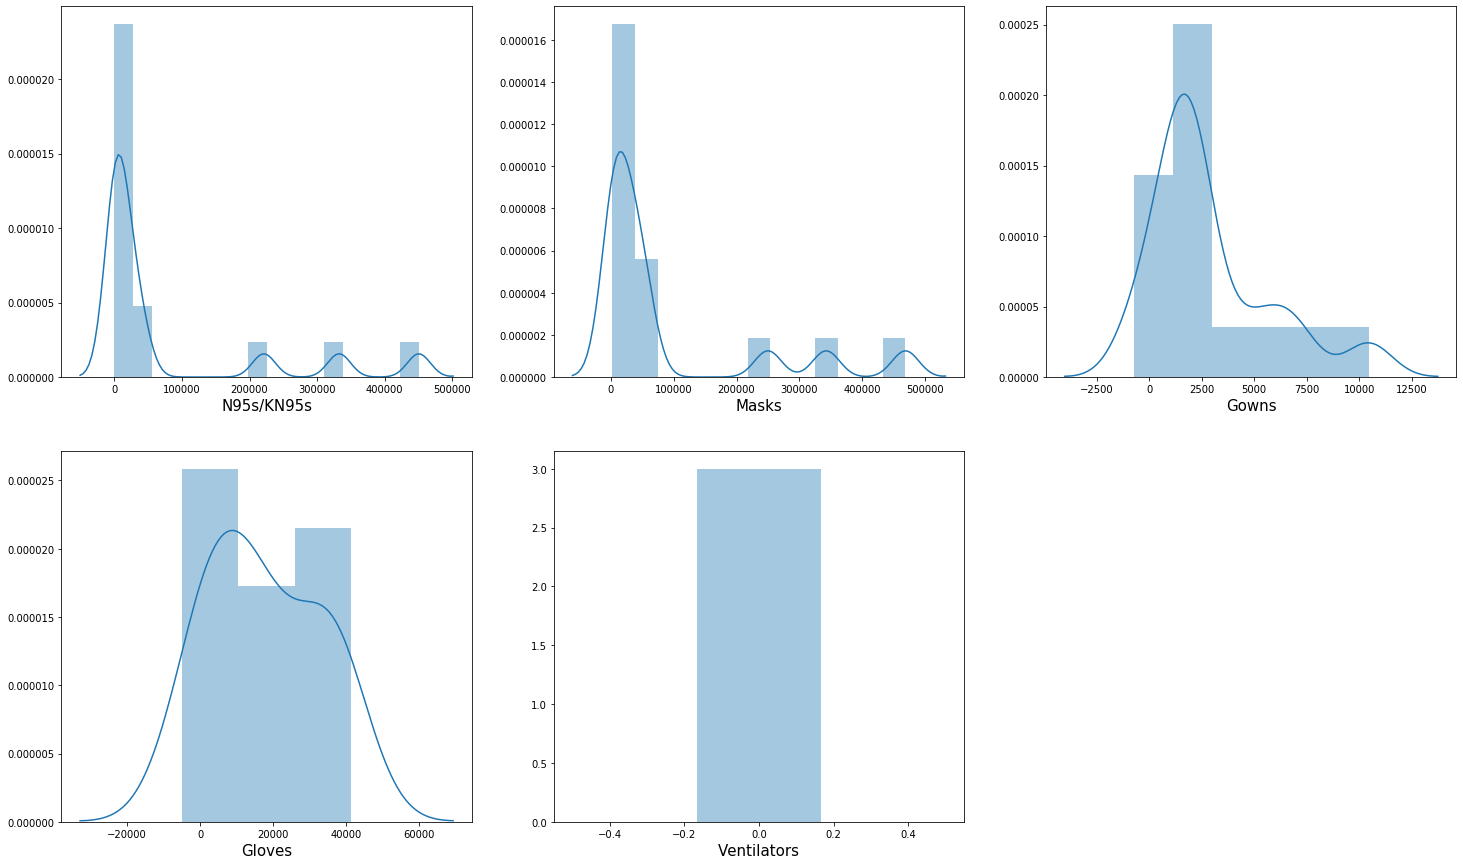

In [33]:
WM = df.loc[df['Region']=='Western Massachusetts']
WM_CC = WM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    WM_CC['{} %'.format(category)] = WM_CC[category]/WM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(WM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
WM_CC

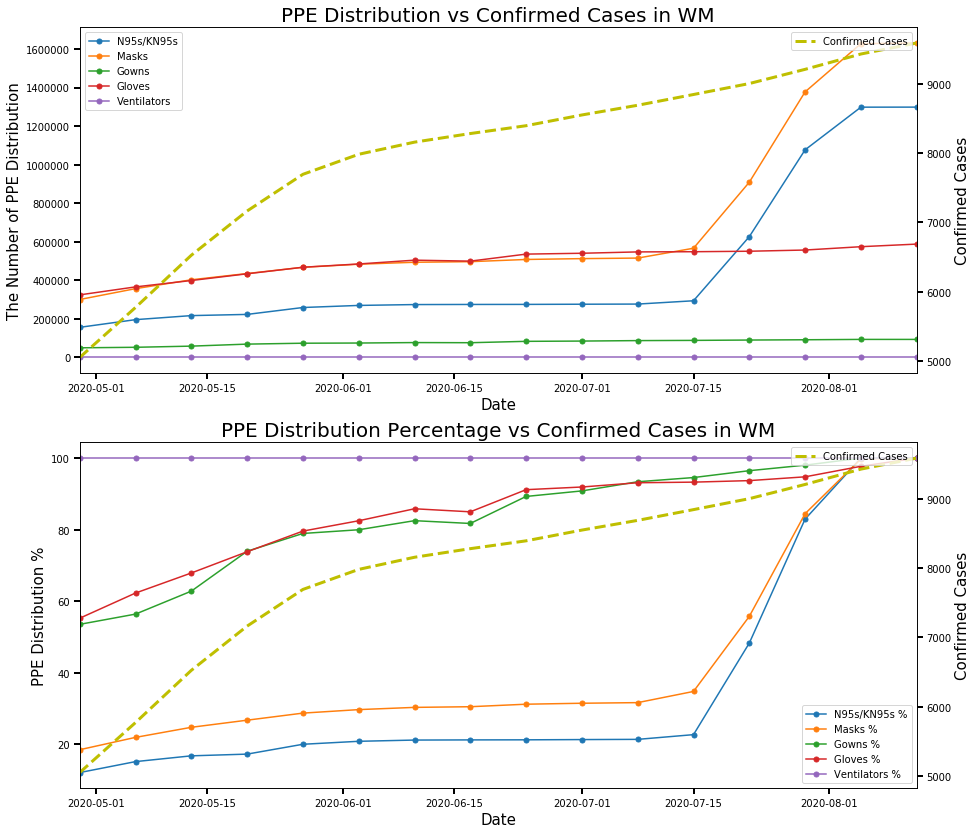

In [34]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=WM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in WM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=WM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=WM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in WM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=WM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [35]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    WM_CC['{} Ratio 1'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
WM_CC['Confirmed Cases(ma1)'] = WM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
WM_CC.iloc[0,-1] = (3763+5052) / 2
for category in categories:
    WM_CC['{} Ratio 2'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
WM_CC['Confirmed Cases(ma2)'] = WM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    WM_CC['{} Ratio 3'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
WM_CC['Confirmed Cases(ma3)'] = WM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
WM_CC.iloc[0,-1] = (3763+5052+5773)/3
for category in categories:
    WM_CC['{} Ratio 4'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    WM_CC['{} Ratio 5'.format(category)] = WM_CC[category].diff()/WM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    WM_CC['{} Ratio 6'.format(category)] = WM_CC[category].diff()/WM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
WM_CC

Time                 Region  N95s/KN95s      Masks    Gowns  \
200 2020-04-29  Western Massachusetts    156323.0   300642.0  50128.0   
207 2020-05-06  Western Massachusetts    196135.0   356892.0  52813.0   
214 2020-05-13  Western Massachusetts    217121.0   402897.0  58829.0   
221 2020-05-20  Western Massachusetts    223347.0   435347.0  69279.0   
228 2020-05-27  Western Massachusetts    259107.0   467597.0  73949.0   
229 2020-06-03  Western Massachusetts    269912.0   483597.0  74919.0   
230 2020-06-10  Western Massachusetts    274382.0   493747.0  77299.0   
231 2020-06-17  Western Massachusetts    274972.0   496797.0  76569.0   
232 2020-06-24  Western Massachusetts    275262.0   508247.0  83649.0   
233 2020-07-01  Western Massachusetts    276162.0   512647.0  85099.0   
234 2020-07-08  Western Massachusetts    276922.0   515447.0  87499.0   
235 2020-07-15  Western Massachusetts    294047.0   566447.0  88599.0   
236 2020-07-22  Western Massachusetts    626547.0   908947.0  90399.0   
237 2020-07-29  Western Massachusetts   1076842.0  1377397.0  91849.0   
238 2020-08-05  Western Massachusetts   1298047.0  1627297.0  93699.0   
239 2020-08-12  Western Massachusetts   1298292.0  1630897.0  93699.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
200  324630.0         60.0           5052.0     12.040666   18.434150   
207  366030.0         60.0           5773.0     15.107156   21.883172   
214  399030.0         60.0           6526.0     16.723588   24.704013   
221  433930.0         60.0           7164.0     17.203141   26.693715   
228  467930.0         60.0           7693.0     19.957529   28.671155   
229  484930.0         60.0           7982.0     20.789776   29.652210   
230  504643.0         60.0           8157.0     21.134075   30.274567   
231  499630.0         60.0           8281.0     21.179519   30.461580   
232  536043.0         60.0           8394.0     21.201856   31.163648   
233  540443.0         60.0           8549.0     21.271178   31.433438   
234  547443.0         60.0           8689.0     21.329716   31.605123   
235  548443.0         60.0           8844.0     22.648757   34.732236   
236  550943.0         60.0           9002.0     48.259328   55.732949   
237  557183.0         60.0           9207.0     82.942974   84.456407   
238  574481.0         60.0           9428.0     99.981129   99.779263   
239  587977.0         60.0           9587.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
200   53.498970   55.211343          100.0           30.942795      59.509501   
207   56.364529   62.252435          100.0           33.974537      61.820890   
214   62.785088   67.864899          100.0           33.270150      61.737205   
221   73.937822   73.800506          100.0           31.176298      60.768705   
228   78.921867   79.583045          100.0           33.680879      60.782140   
229   79.957097   82.474314          100.0           33.815084      60.585943   
230   82.497145   85.826997          100.0           33.637612      60.530465   
231   81.718055   84.974412          100.0           33.205168      59.992392   
232   89.274165   91.167342          100.0           32.792709      60.548844   
233   90.821674   91.915670          100.0           32.303427      59.965727   
234   93.383067   93.106193          100.0           31.870411      59.321786   
235   94.557039   93.276268          100.0           33.248191      64.048734   
236   96.478084   93.701454          100.0           69.600866     100.971673   
237   98.025593   94.762720          100.0          116.959053     149.603237   
238  100.000000   97.704672          100.0          137.679996     172.602567   
239  100.000000  100.000000          100.0          135.422134     170.115469   

     Gowns Ratio 1  Gloves Ratio 1  Ventilators Ratio 1  Confirmed Cases(ma1)  \
200       9.922407       64.257720             0.011876            

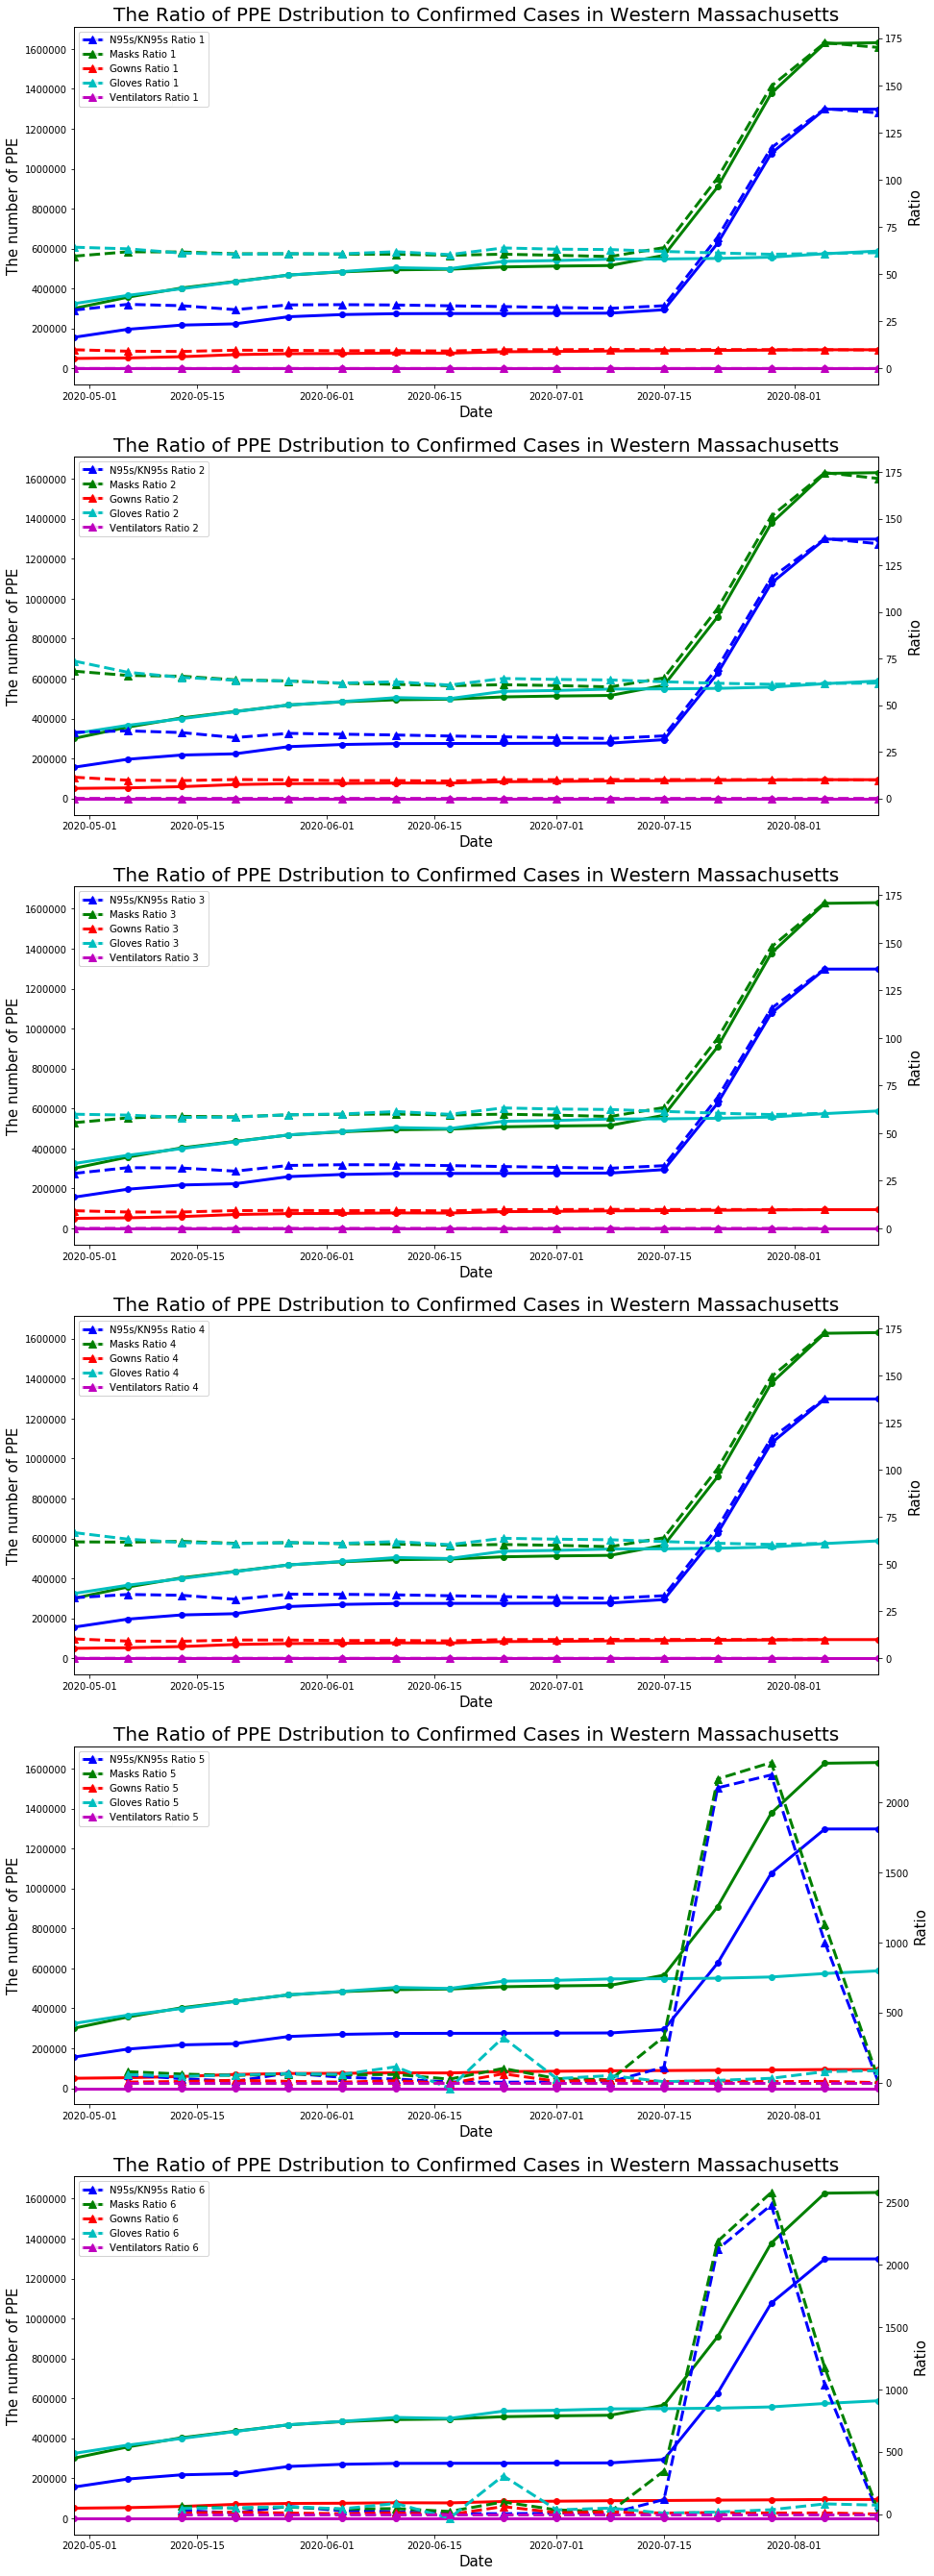

In [36]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=WM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Western Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=WM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

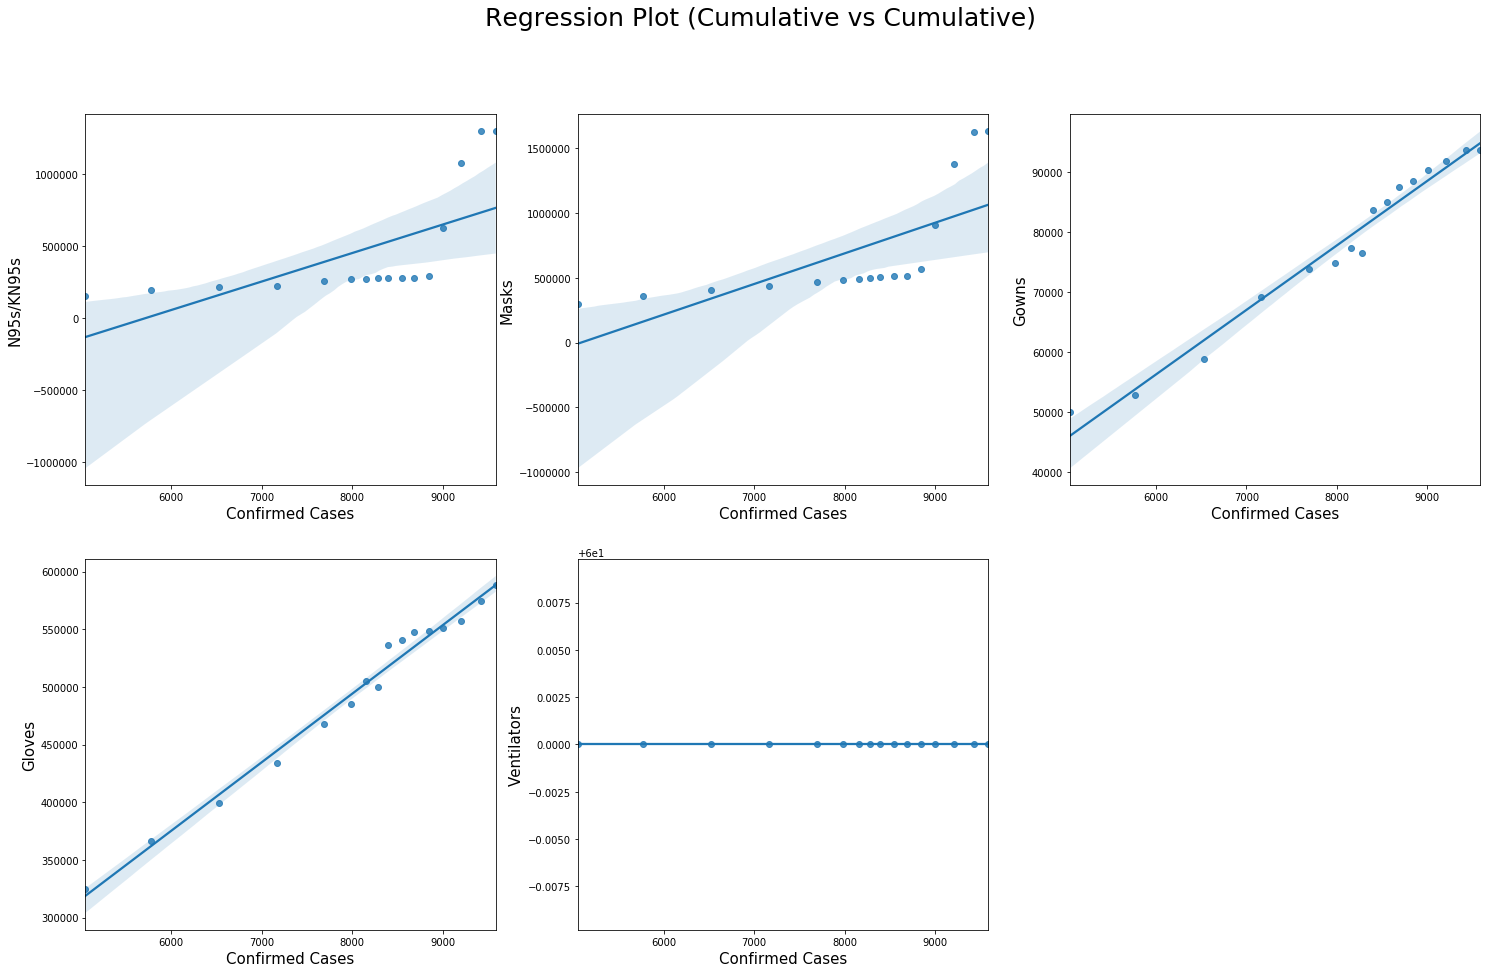

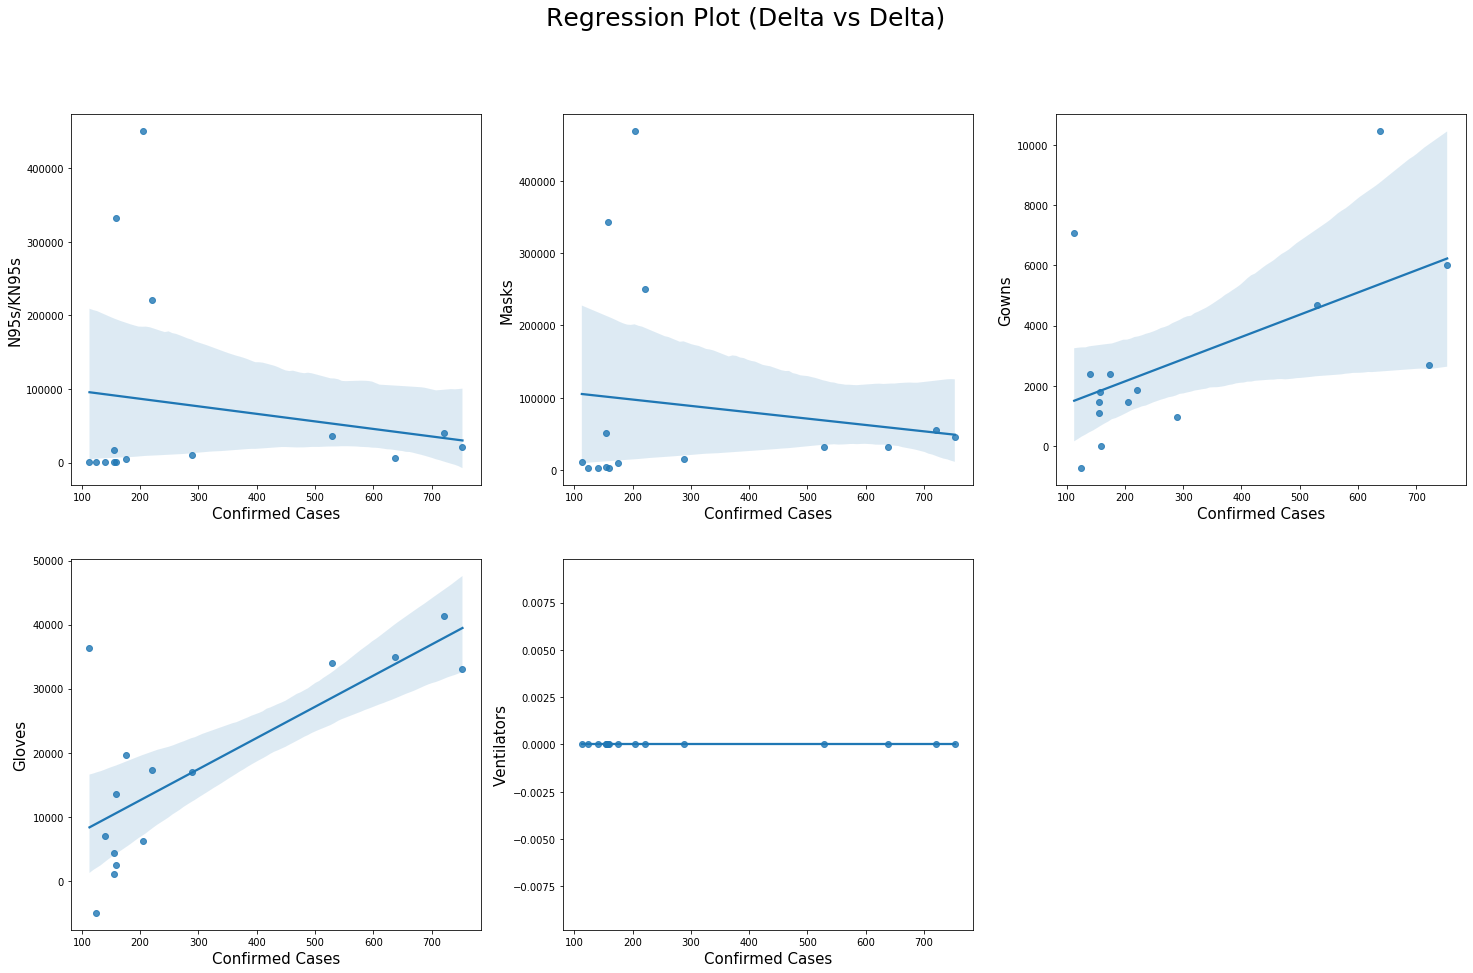

In [37]:
for category in categories:
    WM_CC['{} delta'.format(category)] = WM_CC[category].diff()
    WM_CC['Confirmed Cases delta'] = WM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=WM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=WM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [38]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = WM_CC[category]
    X[categories.index(category)] = WM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     10.16
Date:                Thu, 13 Aug 2020   Prob (F-statistic):            0.00658
Time:                        17:46:34   Log-Likelihood:                -224.09
No. Observations:                  16   AIC:                             452.2
Df Residuals:                      14   BIC:                             453.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.132e+06   5.04e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Massachusetts

In [39]:
MA_CC = df.loc[df['Region']=='Massachusetts'].dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    MA_CC['{} %'.format(category)] = MA_CC[category]/MA_CC[category].iloc[-1] * 100
    
# fig, axes = plt.subplots(2, 3, figsize=(25,15))
# for ax, category in zip(axes.flatten(), categories):
#     sns.distplot(MA_CC[category].diff(), ax=ax)
#     ax.set_xlabel(category, fontsize=15)
# fig.delaxes(axes[1,2])
MA_CC

Time         Region  N95s/KN95s       Masks     Gowns      Gloves  \
280 2020-04-29  Massachusetts    990826.0   1863412.0  285795.0   3987284.0   
287 2020-05-06  Massachusetts   1246197.0   2290427.0  340057.0   5273534.0   
294 2020-05-13  Massachusetts   1385499.0   2744148.0  411454.0   6083122.0   
301 2020-05-20  Massachusetts   1481001.0   2951030.0  476763.0   6643694.0   
308 2020-05-27  Massachusetts   1713615.0   3154780.0  576570.0   7097694.0   
309 2020-06-03  Massachusetts   1784126.0   3290580.0  608770.0   7618366.0   
310 2020-06-10  Massachusetts   2544530.0   3469230.0  638660.0   7888596.0   
311 2020-06-17  Massachusetts   2556595.0   3434680.0  647490.0   7839666.0   
312 2020-06-24  Massachusetts   4388525.0   3538480.0  666890.0   8271946.0   
313 2020-07-01  Massachusetts   4409365.0   4007230.0  678510.0   8867546.0   
314 2020-07-08  Massachusetts   4437140.0   4041230.0  691495.0   8922946.0   
315 2020-07-15  Massachusetts   4530795.0   4689430.0  705322.0   9469546.0   
316 2020-07-22  Massachusetts   7447255.0   6733830.0  714422.0   9590446.0   
317 2020-07-29  Massachusetts   8923945.0  10001695.0  726012.0   9906079.0   
318 2020-08-05  Massachusetts   9292070.0  10451295.0  734962.0   9971377.0   
319 2020-08-12  Massachusetts  10476785.0  11665045.0  736612.0  10116833.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
280        675.0          60265.0      9.457348   15.974323   38.798581   
287        675.0          72025.0     11.894842   19.634961   46.165010   
294        675.0          80497.0     13.224467   23.524538   55.857629   
301        675.0          88970.0     14.136026   25.298059   64.723762   
308        679.0          94220.0     16.356306   27.044731   78.273229   
309        679.0          97964.0     17.029327   28.208892   82.644594   
310        679.0         100158.0     24.287317   29.740391   86.702362   
311        679.0         101654.0     24.402477   29.444207   87.901093   
312        679.0         102762.0     41.888089   30.334045   90.534773   
313        679.0         103858.0     42.087005   34.352461   92.112265   
314        679.0         104961.0     42.352115   34.643930   93.875066   
315        679.0         106128.0     43.246044   40.200702   95.752173   
316        679.0         107413.0     71.083400   57.726567   96.987559   
317        679.0         109096.0     85.178277   85.740732   98.560979   
318        679.0         111371.0     88.691999   89.594982   99.776001   
319        679.0         113198.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  
280   39.412373      99.410898  
287   52.126332      99.410898  
294   60.128718      99.410898  
301   65.669701      99.410898  
308   70.157272     100.000000  
309   75.303862     100.000000  
310   77.974955     100.000000  
311   77.491306     100.000000  
312   81.764185     100.000000  
313   87.651402     100.000000  
314   88.199005     100.000000  
315   93.601881     100.000000  
316   94.796919     100.000000  
317   97.916799     100.000000  
318   98.562238     100.000000  
319  100.000000     100.000000

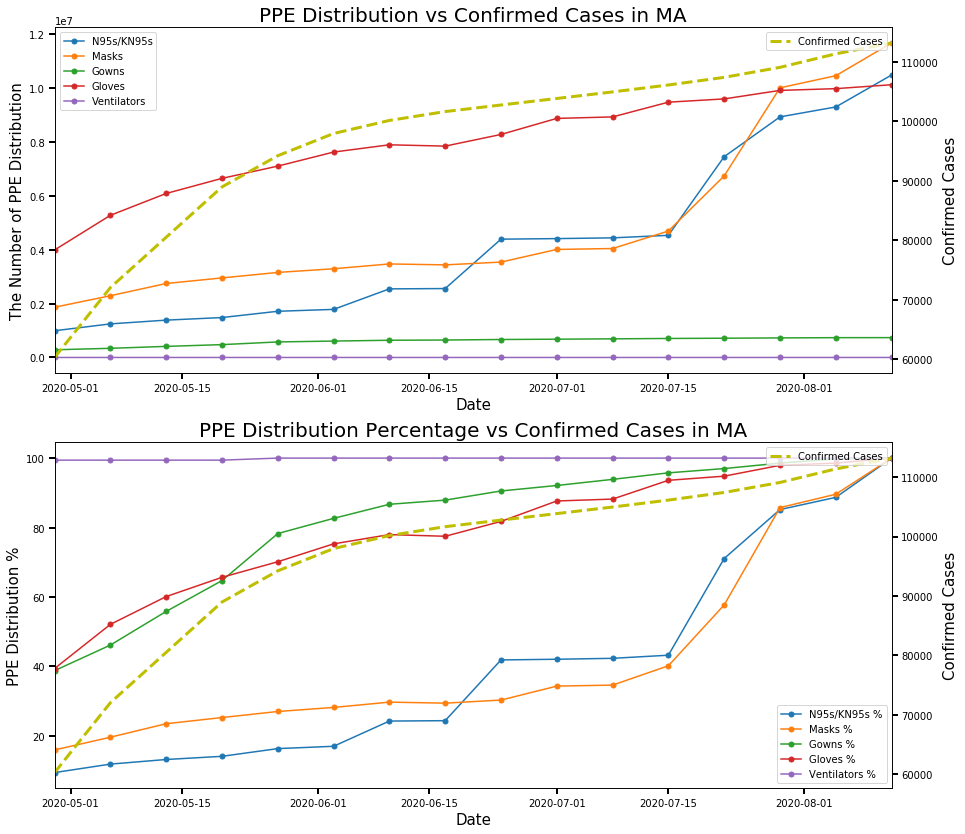

In [40]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=MA_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MA', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=MA_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=MA_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in MA', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=MA_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [41]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    MA_CC['{} Ratio 1'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
MA_CC['Confirmed Cases(ma1)'] = MA_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
MA_CC.iloc[0,-1] = (42944+60265) / 2
for category in categories:
    MA_CC['{} Ratio 2'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
MA_CC['Confirmed Cases(ma2)'] = MA_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    MA_CC['{} Ratio 3'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
MA_CC['Confirmed Cases(ma3)'] = MA_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
MA_CC.iloc[0,-1] = (42944+60265+72025)/3
for category in categories:
    MA_CC['{} Ratio 4'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    MA_CC['{} Ratio 5'.format(category)] = MA_CC[category].diff()/MA_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    MA_CC['{} Ratio 6'.format(category)] = MA_CC[category].diff()/MA_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
MA_CC

Time         Region  N95s/KN95s       Masks     Gowns      Gloves  \
280 2020-04-29  Massachusetts    990826.0   1863412.0  285795.0   3987284.0   
287 2020-05-06  Massachusetts   1246197.0   2290427.0  340057.0   5273534.0   
294 2020-05-13  Massachusetts   1385499.0   2744148.0  411454.0   6083122.0   
301 2020-05-20  Massachusetts   1481001.0   2951030.0  476763.0   6643694.0   
308 2020-05-27  Massachusetts   1713615.0   3154780.0  576570.0   7097694.0   
309 2020-06-03  Massachusetts   1784126.0   3290580.0  608770.0   7618366.0   
310 2020-06-10  Massachusetts   2544530.0   3469230.0  638660.0   7888596.0   
311 2020-06-17  Massachusetts   2556595.0   3434680.0  647490.0   7839666.0   
312 2020-06-24  Massachusetts   4388525.0   3538480.0  666890.0   8271946.0   
313 2020-07-01  Massachusetts   4409365.0   4007230.0  678510.0   8867546.0   
314 2020-07-08  Massachusetts   4437140.0   4041230.0  691495.0   8922946.0   
315 2020-07-15  Massachusetts   4530795.0   4689430.0  705322.0   9469546.0   
316 2020-07-22  Massachusetts   7447255.0   6733830.0  714422.0   9590446.0   
317 2020-07-29  Massachusetts   8923945.0  10001695.0  726012.0   9906079.0   
318 2020-08-05  Massachusetts   9292070.0  10451295.0  734962.0   9971377.0   
319 2020-08-12  Massachusetts  10476785.0  11665045.0  736612.0  10116833.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
280        675.0          60265.0      9.457348   15.974323   38.798581   
287        675.0          72025.0     11.894842   19.634961   46.165010   
294        675.0          80497.0     13.224467   23.524538   55.857629   
301        675.0          88970.0     14.136026   25.298059   64.723762   
308        679.0          94220.0     16.356306   27.044731   78.273229   
309        679.0          97964.0     17.029327   28.208892   82.644594   
310        679.0         100158.0     24.287317   29.740391   86.702362   
311        679.0         101654.0     24.402477   29.444207   87.901093   
312        679.0         102762.0     41.888089   30.334045   90.534773   
313        679.0         103858.0     42.087005   34.352461   92.112265   
314        679.0         104961.0     42.352115   34.643930   93.875066   
315        679.0         106128.0     43.246044   40.200702   95.752173   
316        679.0         107413.0     71.083400   57.726567   96.987559   
317        679.0         109096.0     85.178277   85.740732   98.560979   
318        679.0         111371.0     88.691999   89.594982   99.776001   
319        679.0         113198.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
280   39.412373      99.410898           16.441152      30.920302   
287   52.126332      99.410898           17.302284      31.800444   
294   60.128718      99.410898           17.211809      34.090065   
301   65.669701      99.410898           16.646072      33.168821   
308   70.157272     100.000000           18.187381      33.483125   
309   75.303862     100.000000           18.212057      33.589686   
310   77.974955     100.000000           25.405160      34.637573   
311   77.491306     100.000000           25.149970      33.787947   
312   81.764185     100.000000           42.705718      34.433740   
313   87.651402     100.000000           42.455709      38.583739   
314   88.199005     100.000000           42.274178      38.502206   
315   93.601881     100.000000           42.691797      44.186548   
316   94.796919     100.000000           69.332902      62.691015   
317   97.916799     100.000000           81.799012      91.677926   
318   98.562238     100.000000           83.433479      93.842158   
319  100.000000     100.000000           92.552739     103.049921   

     Gowns Ratio 1  Gloves Ratio 1  Ventilators Ratio 1  Confirmed Cases(ma1)  \
280       4.742305       66.162516             0.011201               51604.5   
287       4.721375       73.218105             0.00937

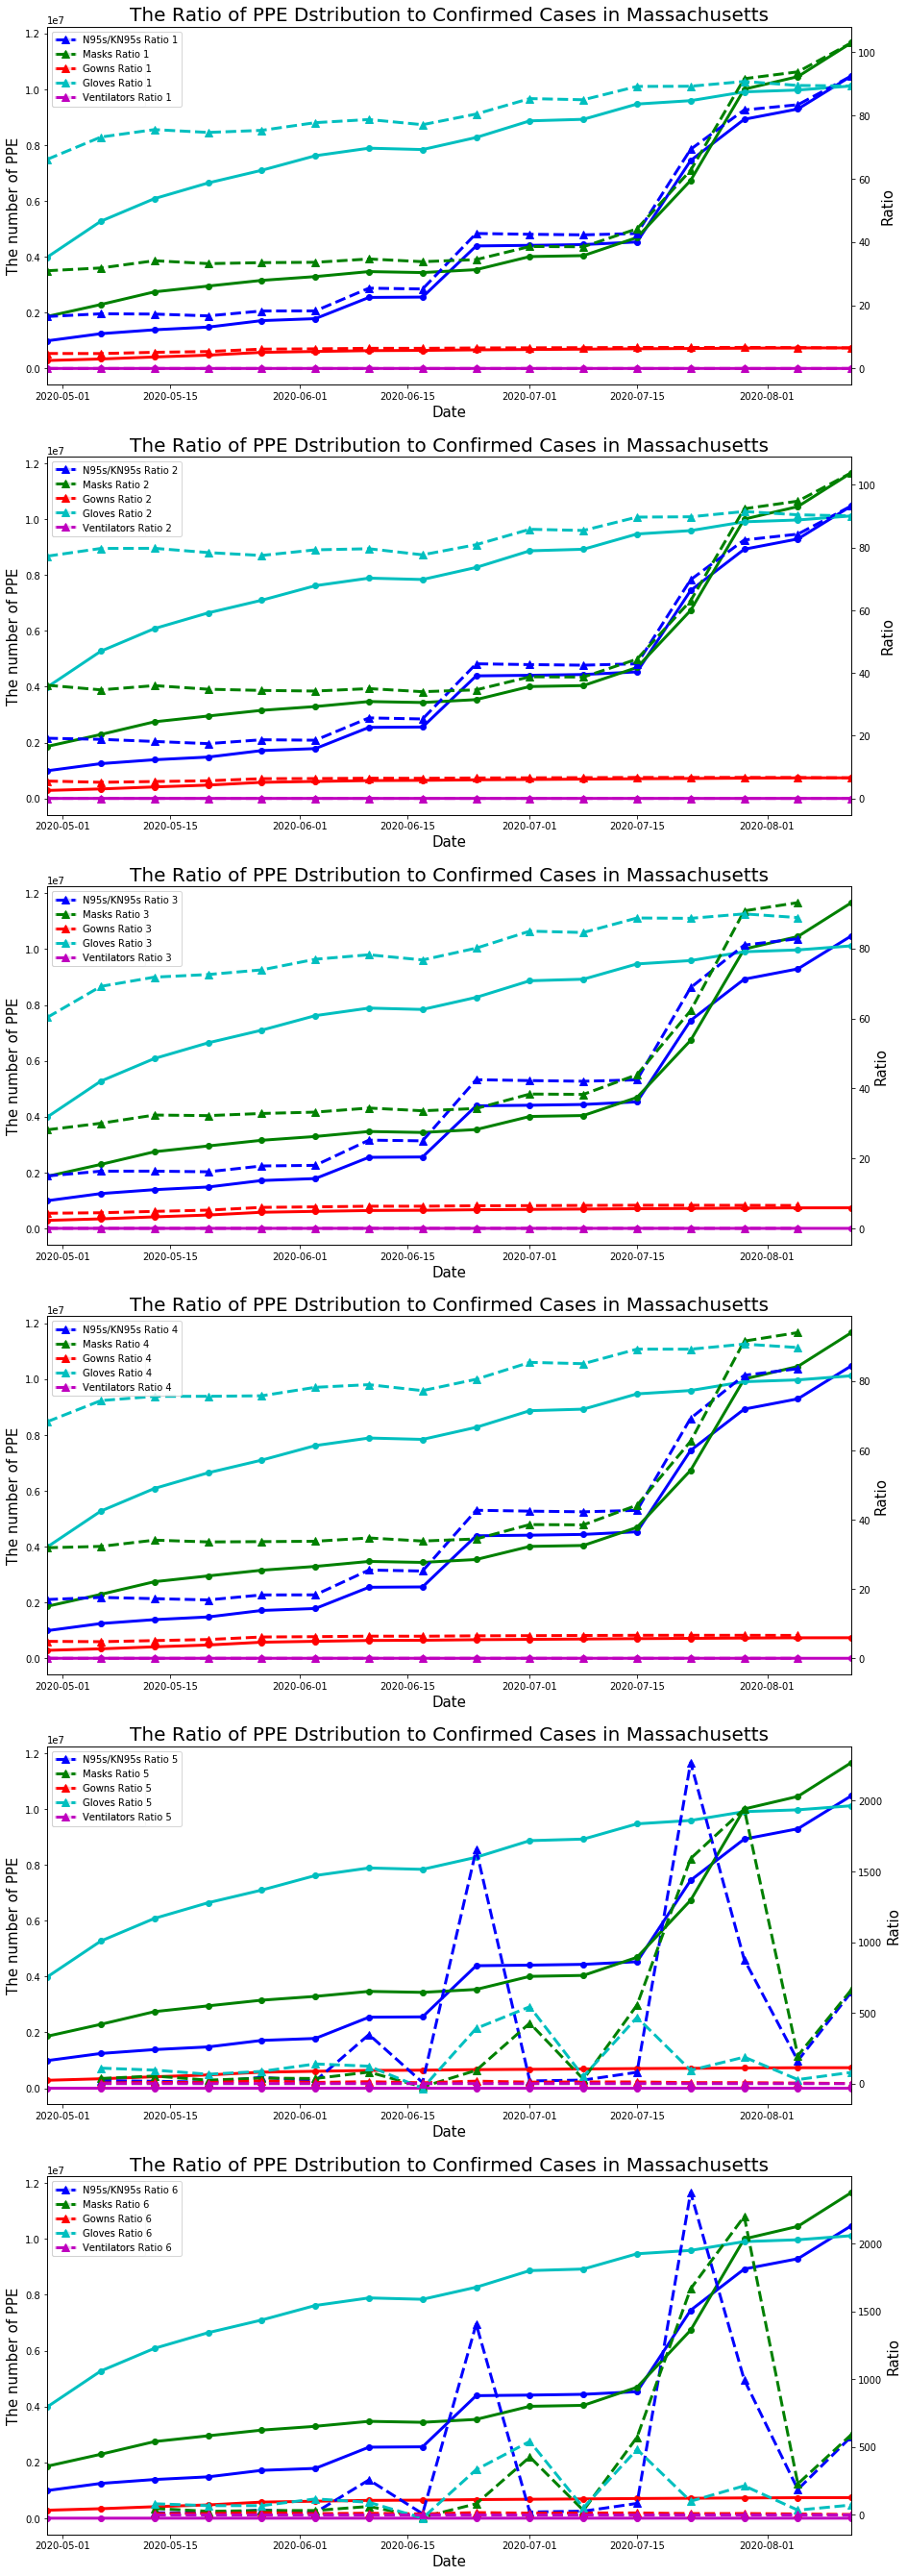

In [42]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=MA_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 8, 12)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=MA_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

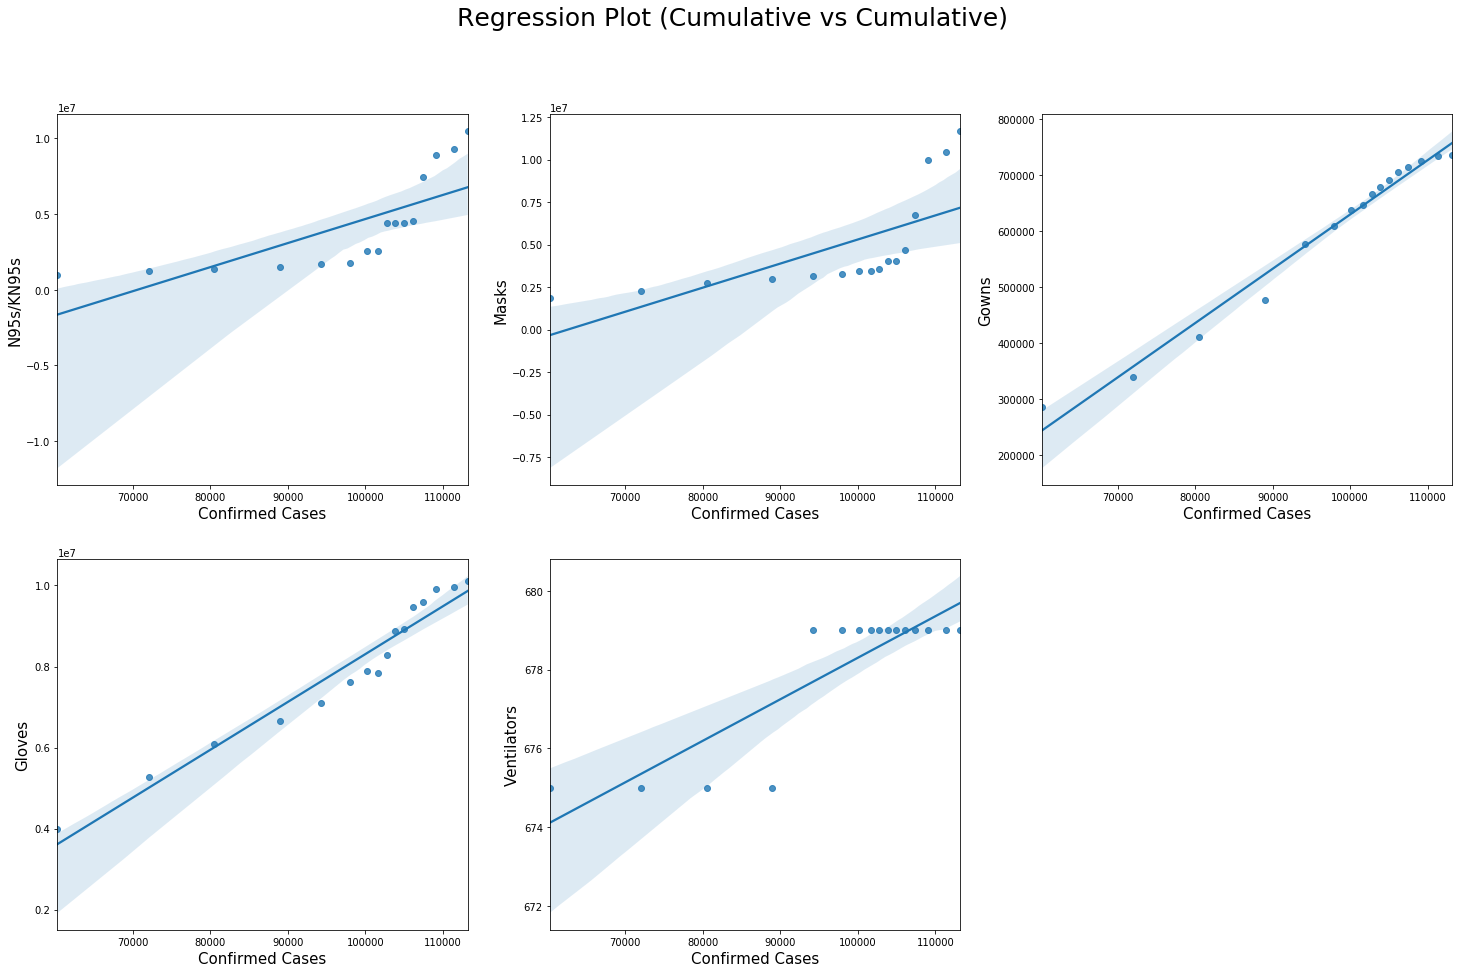

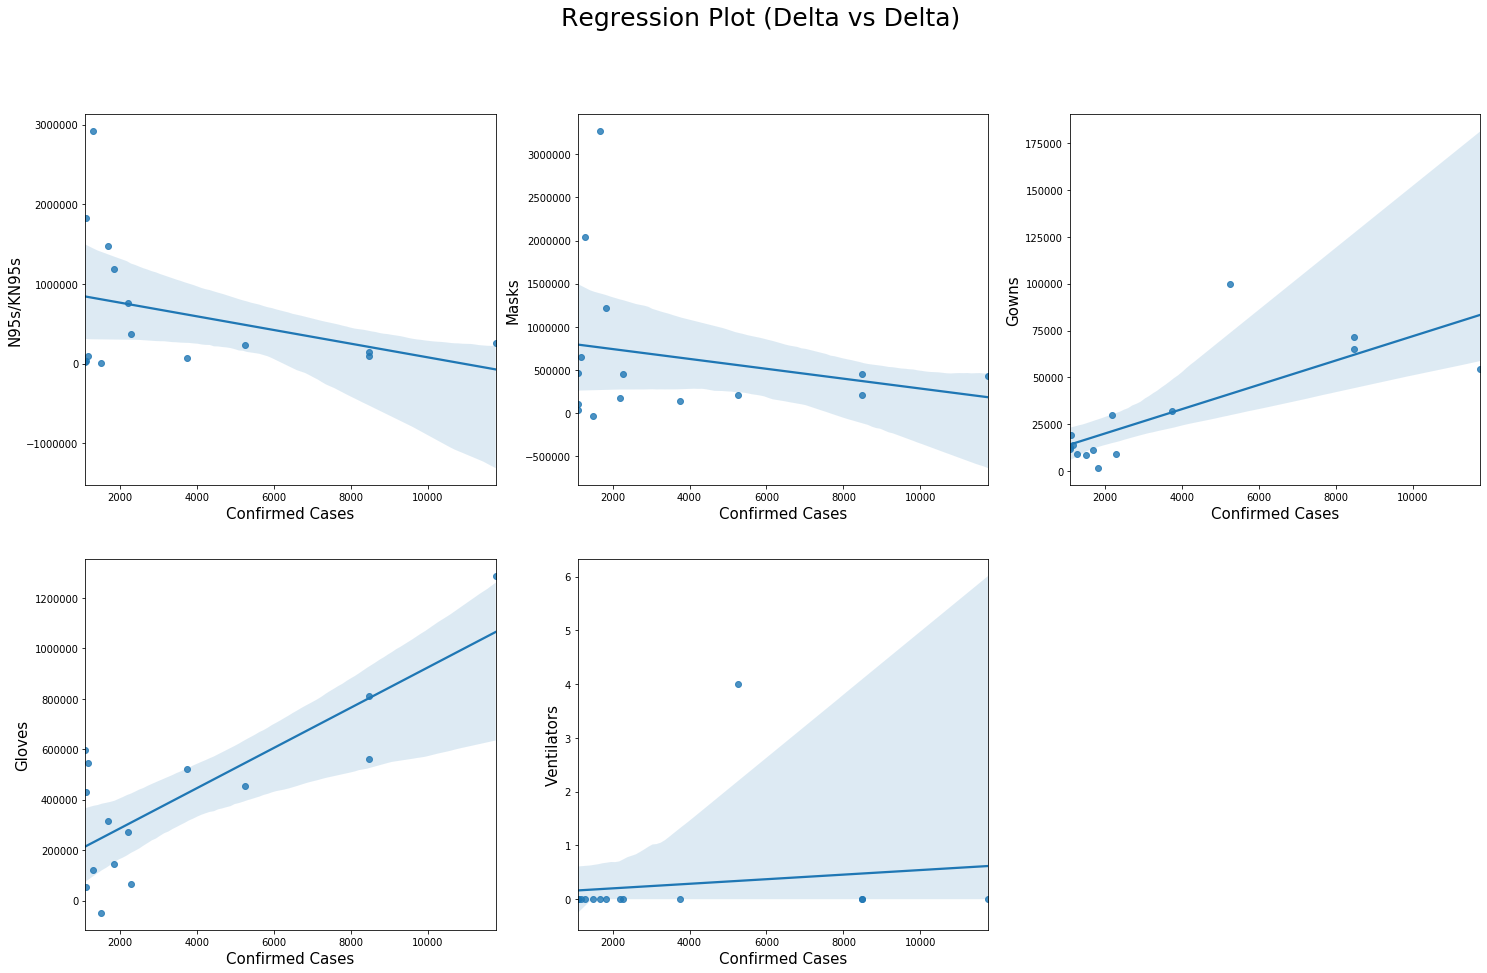

In [43]:
for category in categories:
    MA_CC['{} delta'.format(category)] = MA_CC[category].diff()
    MA_CC['Confirmed Cases delta'] = MA_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=MA_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=MA_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [44]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = MA_CC[category]
    X[categories.index(category)] = MA_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     17.50
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           0.000920
Time:                        17:46:40   Log-Likelihood:                -255.18
No. Observations:                  16   AIC:                             514.4
Df Residuals:                      14   BIC:                             515.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.122e+07   3.73e+06     